# Deep Learning Model Design for MNIST and Fashion MNIST Data


In [2]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import Markdown, display

## Load MNIST Dataset

In [3]:
#2d greyscale images
mnist = tf.keras.datasets.mnist #28x28 spatial dimension, 1 color dimension (28x28x1), 10 classes (numbers 0-9)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#divide by 255 to normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
display(Markdown('**Data Description**'))
display(Markdown(f"Training sample size: {x_train.shape[0]}"), 
Markdown(f"Testing sample size: {x_test.shape[0]}"))

**Data Description**

Training sample size: 60000

Testing sample size: 10000

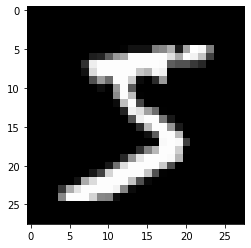

In [118]:
image = x_train[0]
plt.imshow(image, cmap='gray')
plt.savefig('imexample.png')
plt.show()

## Model 1: Baseline Model

- Unregularized MLP with 2 hidden layers with 16 uints and ReLU activations
- Params
  - 100 epochs
  - Optimizer: Adam
  - Batch size = 128

**Network Architecture**

- Input Layer
  + Input size = (28, 28)

- Flatten input for Fully Connected Network

- Hidden Layer 1
  + Dense Layer
  + Units = 16
  + Activation: ReLU

- Hidden Layer 2
  + Dense Layer
  + Units = 16
  + Activation: ReLU

- Output Layer
  + Output size = (10)
  + Activation: Softmax

In [6]:
# fully connected model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape= (28,28)),                                
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy']
              )

display(Markdown("default hyperparameters for `Adam` optimizer:"),
        Markdown("`tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')`"))

# define params

num_epochs = 100
batch= 128

# Fit the model on training data
base_start= time.time()
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch, validation_split=0.2)
base_end = time.time()

display(Markdown(f"Training time: {base_end-base_start : .4f}s"))


default hyperparameters for `Adam` optimizer:

`tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')`

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7413 - sparse_categorical_accuracy: 0.7807 - val_loss: 0.3408 - val_sparse_categorical_accuracy: 0.9024
Epoch 2/100
375/375 [==============================] - 1s 1ms/step - loss: 0.3196 - sparse_categorical_accuracy: 0.9091 - val_loss: 0.2710 - val_sparse_categorical_accuracy: 0.9210
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2660 - sparse_categorical_accuracy: 0.9248 - val_loss: 0.2395 - val_sparse_categorical_accuracy: 0.9354
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2345 - sparse_categorical_accuracy: 0.9335 - val_loss: 0.2194 - val_sparse_categorical_accuracy: 0.9396
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2111 - sparse_categorical_accuracy: 0.9401 - val_loss: 0.2070 - val_sparse_categorical_accuracy: 0.9424
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1948 - sparse_cate

375/375 [==============================] - 1s 1ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0.9772 - val_loss: 0.1829 - val_sparse_categorical_accuracy: 0.9526
Epoch 47/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.1876 - val_sparse_categorical_accuracy: 0.9513
Epoch 48/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.1857 - val_sparse_categorical_accuracy: 0.9534
Epoch 49/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0737 - sparse_categorical_accuracy: 0.9777 - val_loss: 0.1882 - val_sparse_categorical_accuracy: 0.9522
Epoch 50/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0733 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.1931 - val_sparse_categorical_accuracy: 0.9522
Epoch 51/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0716 - sparse_categorical

375/375 [==============================] - 1s 1ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.2490 - val_sparse_categorical_accuracy: 0.9486
Epoch 92/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0466 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.2480 - val_sparse_categorical_accuracy: 0.9497
Epoch 93/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9866 - val_loss: 0.2565 - val_sparse_categorical_accuracy: 0.9495
Epoch 94/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0455 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.2545 - val_sparse_categorical_accuracy: 0.9482
Epoch 95/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0453 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.2624 - val_sparse_categorical_accuracy: 0.9466
Epoch 96/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0449 - sparse_categorical

Training time:  56.7092s

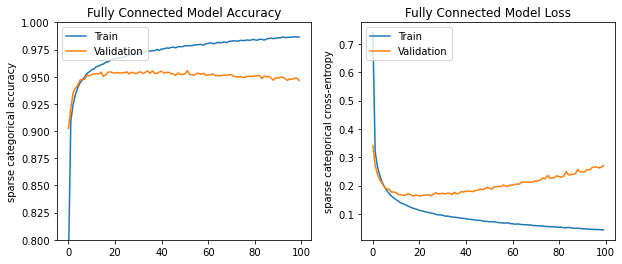

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Fully Connected Model Accuracy')
plt.xlabel=('epochs')
plt.ylabel('sparse categorical accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0.8, 1)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Fully Connected Model Loss')
plt.xlabel=('epochs')
plt.ylabel('sparse categorical cross-entropy')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.savefig('model_performance.png');

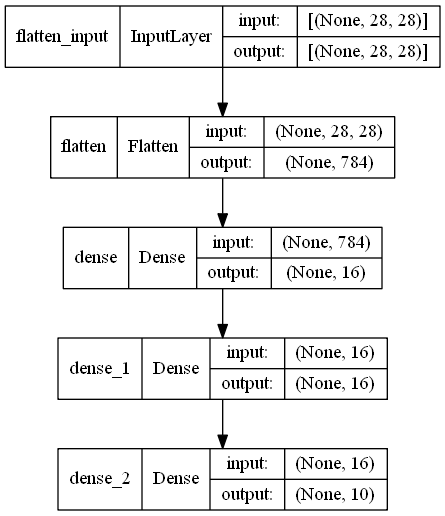

In [120]:
tf.keras.utils.plot_model(model, 'base_model.png', show_shapes=True) # saved in file dir

In [9]:
display(Markdown("**Input dimensionalities**: (28,18)"),
        Markdown("**Output Dimensionalities**: (10)"),
        Markdown("The output would be a label from (0, 10) for the corresponding feature"))

**Input dimensionalities**: (28,18)

**Output Dimensionalities**: (10)

The output would be a label from (0, 10) for the corresponding feature

In [11]:
display(Markdown(f"**Training time for {num_epochs} epochs**: {(base_end-base_start): .3f}s"))

**Training time for 100 epochs**:  56.709s

In [12]:
# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose= 1) 
display(Markdown(f"Testing loss = {test_loss: .4f}"),
        Markdown(f"Testing accuracy: {test_accuracy: .4f}"))

313/313 [==============================] - 0s 872us/step - loss: 0.2591 - sparse_categorical_accuracy: 0.9509


Testing loss =  0.2591

Testing accuracy:  0.9509

## Complex Models

### Early Stopping patience size
We need early stopping callback since running all 100epochs will be computationally expensive and will overfit. In the basline model above, after 100 epochs it was evident that the model was overfitting.
In implementing early stopping, we are trying to figure out which patience size will be best, trying on the baseline model for computational efficiency purposes.

In [13]:
#regularization with early stopping (figuring out patience parameter)
nets = 5
e_model = [0]*nets
patience = [1,2,3,4,5]
output_list_e = []

start_full_e = time.time()
for j in range(5):
    e_model[j] = tf.keras.models.Sequential()
    e_model[j].add(tf.keras.layers.Flatten(input_shape=(28,28)))
    e_model[j].add(tf.keras.layers.Dense(16, activation='relu'))
    e_model[j].add(tf.keras.layers.Dense(16,activation='relu'))
    e_model[j].add(tf.keras.layers.Dense(10, activation='softmax'))
    early_stop = tf.keras.callbacks.EarlyStopping(patience=patience[j]) 
    e_model[j].compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

    start= time.time()
    output_list_e.append(e_model[j].fit(x_train, y_train, validation_split=0.2,epochs=100, batch_size=128,callbacks= early_stop))
    end= time.time()
    display(Markdown(f"**Patience** = {patience[j]};  **Training time** = {end-start: .3f} s;  **Epochs** = {len(output_list_e[j].epoch)}"))

end_full_e = time.time()

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7927 - sparse_categorical_accuracy: 0.7671 - val_loss: 0.3462 - val_sparse_categorical_accuracy: 0.9026
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3172 - sparse_categorical_accuracy: 0.9107 - val_loss: 0.2727 - val_sparse_categorical_accuracy: 0.9225
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2678 - sparse_categorical_accuracy: 0.9240 - val_loss: 0.2513 - val_sparse_categorical_accuracy: 0.9273
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2396 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.2273 - val_sparse_categorical_accuracy: 0.9348
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2175 - sparse_categorical_accuracy: 0.9380 - val_loss: 0.2090 - val_sparse_categorical_accuracy: 0.9413
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2018 - sparse_cate

**Patience** = 1;  **Training time** =  7.055 s;  **Epochs** = 12

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7595 - sparse_categorical_accuracy: 0.7774 - val_loss: 0.3485 - val_sparse_categorical_accuracy: 0.9058
Epoch 2/100
375/375 [==============================] - 1s 1ms/step - loss: 0.3205 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.2684 - val_sparse_categorical_accuracy: 0.9226
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2628 - sparse_categorical_accuracy: 0.9238 - val_loss: 0.2382 - val_sparse_categorical_accuracy: 0.9324
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2360 - sparse_categorical_accuracy: 0.9316 - val_loss: 0.2284 - val_sparse_categorical_accuracy: 0.9354
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2189 - sparse_categorical_accuracy: 0.9368 - val_loss: 0.2164 - val_sparse_categorical_accuracy: 0.9368
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2051 - sparse_cate

**Patience** = 2;  **Training time** =  9.240 s;  **Epochs** = 16

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7418 - sparse_categorical_accuracy: 0.7742 - val_loss: 0.3385 - val_sparse_categorical_accuracy: 0.9036
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.3301 - sparse_categorical_accuracy: 0.9061 - val_loss: 0.2706 - val_sparse_categorical_accuracy: 0.9222
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2713 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.2344 - val_sparse_categorical_accuracy: 0.9329
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2361 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.2169 - val_sparse_categorical_accuracy: 0.9373
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2137 - sparse_categorical_accuracy: 0.9380 - val_loss: 0.2057 - val_sparse_categorical_accuracy: 0.9433
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1976 - sparse_cate

**Patience** = 3;  **Training time** =  11.253 s;  **Epochs** = 19

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8220 - sparse_categorical_accuracy: 0.7438 - val_loss: 0.3285 - val_sparse_categorical_accuracy: 0.9052
Epoch 2/100
375/375 [==============================] - 1s 1ms/step - loss: 0.3174 - sparse_categorical_accuracy: 0.9087 - val_loss: 0.2756 - val_sparse_categorical_accuracy: 0.9190
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2733 - sparse_categorical_accuracy: 0.9218 - val_loss: 0.2455 - val_sparse_categorical_accuracy: 0.9279
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2471 - sparse_categorical_accuracy: 0.9279 - val_loss: 0.2366 - val_sparse_categorical_accuracy: 0.9324
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2248 - sparse_categorical_accuracy: 0.9361 - val_loss: 0.2103 - val_sparse_categorical_accuracy: 0.9398
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2036 - sparse_cate

**Patience** = 4;  **Training time** =  15.228 s;  **Epochs** = 27

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7403 - sparse_categorical_accuracy: 0.7861 - val_loss: 0.3207 - val_sparse_categorical_accuracy: 0.9130
Epoch 2/100
375/375 [==============================] - 1s 1ms/step - loss: 0.3027 - sparse_categorical_accuracy: 0.9124 - val_loss: 0.2562 - val_sparse_categorical_accuracy: 0.9280
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2525 - sparse_categorical_accuracy: 0.9273 - val_loss: 0.2246 - val_sparse_categorical_accuracy: 0.9361
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2268 - sparse_categorical_accuracy: 0.9341 - val_loss: 0.2136 - val_sparse_categorical_accuracy: 0.9390
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 0.2098 - sparse_categorical_accuracy: 0.9396 - val_loss: 0.2043 - val_sparse_categorical_accuracy: 0.9417
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1977 - sparse_cate

**Patience** = 5;  **Training time** =  13.012 s;  **Epochs** = 23

In [15]:
display(Markdown(f"**Total training time for 5 patience sizes**: {(end_full_e -start_full_e): .3f}s"))

**Total training time for 5 patience sizes**:  55.938s

In [124]:
t_epochs = np.zeros(5)
names = ["patience = 1", "patience = 2", "patience = 3", "patience = 4", "patience=5"]

for i in range(5):
    t_epochs[i] = len(output_list_e[i].epoch)
    display(Markdown(f"**{names[i]} :** {t_epochs[i]} epochs to converge"))

display(Markdown(f"The shortest was {min(t_epochs)} and the longest was {max(t_epochs)}"))

**patience = 1 :** 12.0 epochs to converge

**patience = 2 :** 16.0 epochs to converge

**patience = 3 :** 19.0 epochs to converge

**patience = 4 :** 27.0 epochs to converge

**patience=5 :** 23.0 epochs to converge

The shortest was 12.0 and the longest was 27.0

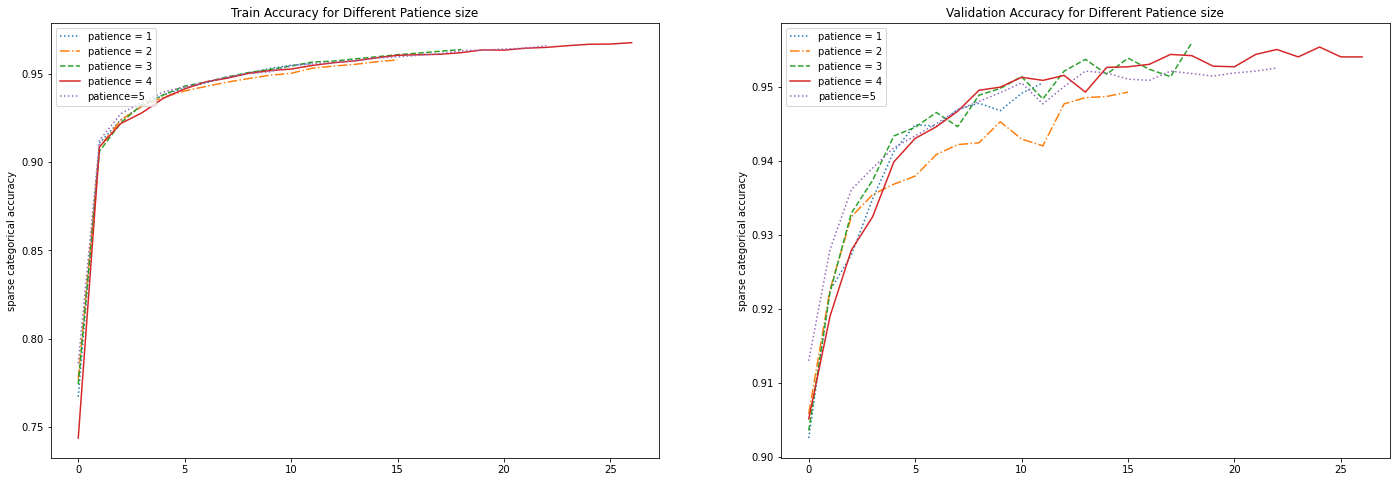

In [125]:
plt.figure(figsize=(24,8))
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

plt.subplot(1, 2, 1)

for i in range(5):
    plt.plot(output_list_e[i].history['sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Train Accuracy for Different Patience size')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])


plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(output_list_e[i].history['val_sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Validation Accuracy for Different Patience size')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])

plt.savefig('patience_mnist.png');
plt.show()



In [19]:
loss = np.zeros(5)
accuracy= np.zeros(5)
for i in range(5):
  loss[i], accuracy[i] = e_model[i].evaluate(x_test, y_test)

313/313 [==============================] - 0s 885us/step - loss: 0.1769 - sparse_categorical_accuracy: 0.9524


In [20]:
display(Markdown(f"Different patience levels give a test accuracy centered around {np.mean(accuracy) :.3f}"),
        Markdown(f"The minimum is {min(accuracy):.4f} and the maximum is {max(accuracy) :.4f}"))

Different patience levels give a test accuracy centered around 0.951

The minimum is 0.9481 and the maximum is 0.9557

Patience = 3 seems best: implement `tf.keras.callbacks.Earlystopping(patience= 3)` for all further steps

In [23]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)

### Complex Models Network Architecture






Network 1: [Input Layer, Hidden Layer 1, Hidden Layer 4, Output Layer]

Network 2: [Input Layer, Hidden Layer 1, Hidden Layer 2, Hidden Layer 4, Output Layer]

Network 3: [Input Layer, Hidden Layer 1, Hidden Layer 2, Hidden Layer 3, Hidden Layer 4, Output Layer]

For each network, we will test 3 different learning rates, 3 different filter sizes, and 3 different Dense layer unit size -- 3\*3\*3\*3 = 81 model comparisons in total
- learning rates: [Adam(0.01), Adam(0.001), Adam(0.0001)]
- filter sizes: [16, 24, 32]
- dense layer unit sizes: [64, 128, 256]


**Network Architecture**
- Input Layer
  + Input size = (28, 28, 1)

- Hidden Layer 1
  + Conv2D Layer
  + Filters = [16, 24, 32]
  + Kernel size = (2,2)
  + Activation: ReLU


- Hidden Layer 2
  + Conv2D Layer
  + Filters = [16, 24, 32]
  + Kernel size = (2,2)
  + Activation: ReLU

- Hidden Layer 3
  + Conv2D Layer
  + Filters = [16, 24, 32]
  + Kernel size = (2,2)
  + Activation: ReLU

- Hidden Layer 4
  + Dense Layer
  + Units = [64, 128, 256]
  + Activation: ReLU

- Output Layer
  + Output size = (10)
  + Activation: Softmax

### Model 1

**Build and Train 9 Complex Model 1s**

- use early stop call back(patience= 3) : it seems that the model was overfitting in baseline model with all training 100 epochs
- implement validation split 0.2

In [24]:
nets= 3*3

filter= [16, 24, 32]
dense= [64, 128, 256]

In [25]:
# we will add conv layers incrementally with a Dense layer
# create a for loop to try different parameters

### 1 HIDDEN CONV2D LAYER ###

c_model1 = [0]*nets
history1 = [0]*nets

start_full = time.time()

i = 0
for j in range(3):
  for k in range(3):
    c_model1[i] = tf.keras.Sequential()
    c_model1[i].add(tf.keras.layers.Conv2D(filter[j],kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    
    c_model1[i].add(tf.keras.layers.Flatten())
    c_model1[i].add(tf.keras.layers.Dense(dense[k], activation='relu'))
    c_model1[i].add(tf.keras.layers.Dense(10, activation='softmax'))
    
    c_model1[i].compile(optimizer= tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

    start = time.time()
    history1[i] =  c_model1[i].fit(x_train, y_train, validation_split= 0.2,  epochs=100, batch_size=128, callbacks = [early_stop])
    end = time.time()
    display(Markdown(f"**Training time for {len(history1[i].epoch)} epochs**: {(end-start): .3f}s"))

    i += 1

end_full = time.time()

Epoch 1/100
375/375 [==============================] - 6s 16ms/step - loss: 0.2320 - sparse_categorical_accuracy: 0.9327 - val_loss: 0.1011 - val_sparse_categorical_accuracy: 0.9707
Epoch 2/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9769 - val_loss: 0.0750 - val_sparse_categorical_accuracy: 0.9781
Epoch 3/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0491 - sparse_categorical_accuracy: 0.9850 - val_loss: 0.0735 - val_sparse_categorical_accuracy: 0.9783
Epoch 4/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0379 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.0671 - val_sparse_categorical_accuracy: 0.9800
Epoch 5/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9828
Epoch 6/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0202 - spars

**Training time for 9 epochs**:  55.022s

Epoch 1/100
375/375 [==============================] - 7s 19ms/step - loss: 0.2068 - sparse_categorical_accuracy: 0.9401 - val_loss: 0.0820 - val_sparse_categorical_accuracy: 0.9762
Epoch 2/100
375/375 [==============================] - 7s 19ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9818 - val_loss: 0.0598 - val_sparse_categorical_accuracy: 0.9824
Epoch 3/100
375/375 [==============================] - 7s 19ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0581 - val_sparse_categorical_accuracy: 0.9831
Epoch 4/100
375/375 [==============================] - 8s 20ms/step - loss: 0.0236 - sparse_categorical_accuracy: 0.9924 - val_loss: 0.0594 - val_sparse_categorical_accuracy: 0.9837
Epoch 5/100
375/375 [==============================] - 7s 19ms/step - loss: 0.0168 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.0538 - val_sparse_categorical_accuracy: 0.9847
Epoch 6/100
375/375 [==============================] - 7s 19ms/step - loss: 0.0104 - spars

**Training time for 8 epochs**:  57.772s

Epoch 1/100
375/375 [==============================] - 10s 26ms/step - loss: 0.1980 - sparse_categorical_accuracy: 0.9408 - val_loss: 0.0811 - val_sparse_categorical_accuracy: 0.9757
Epoch 2/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0606 - sparse_categorical_accuracy: 0.9818 - val_loss: 0.0650 - val_sparse_categorical_accuracy: 0.9801
Epoch 3/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0604 - val_sparse_categorical_accuracy: 0.9833
Epoch 4/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0215 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0577 - val_sparse_categorical_accuracy: 0.9822
Epoch 5/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0147 - sparse_categorical_accuracy: 0.9954 - val_loss: 0.0618 - val_sparse_categorical_accuracy: 0.9831
Epoch 6/100
375/375 [==============================] - 9s 25ms/step - loss: 0.0116 - spar

**Training time for 7 epochs**:  65.695s

Epoch 1/100
375/375 [==============================] - 8s 20ms/step - loss: 0.2048 - sparse_categorical_accuracy: 0.9392 - val_loss: 0.0885 - val_sparse_categorical_accuracy: 0.9728
Epoch 2/100
375/375 [==============================] - 7s 20ms/step - loss: 0.0624 - sparse_categorical_accuracy: 0.9818 - val_loss: 0.0590 - val_sparse_categorical_accuracy: 0.9827
Epoch 3/100
375/375 [==============================] - 7s 20ms/step - loss: 0.0388 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.0616 - val_sparse_categorical_accuracy: 0.9812
Epoch 4/100
375/375 [==============================] - 7s 20ms/step - loss: 0.0256 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.0616 - val_sparse_categorical_accuracy: 0.9818
Epoch 5/100
375/375 [==============================] - 7s 20ms/step - loss: 0.0178 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.0638 - val_sparse_categorical_accuracy: 0.9827


**Training time for 5 epochs**:  37.396s

Epoch 1/100
375/375 [==============================] - 9s 23ms/step - loss: 0.2020 - sparse_categorical_accuracy: 0.9405 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9723
Epoch 2/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0635 - sparse_categorical_accuracy: 0.9810 - val_loss: 0.0668 - val_sparse_categorical_accuracy: 0.9797
Epoch 3/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0549 - val_sparse_categorical_accuracy: 0.9839
Epoch 4/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0252 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9826
Epoch 5/100
375/375 [==============================] - 9s 24ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9953 - val_loss: 0.0584 - val_sparse_categorical_accuracy: 0.9832
Epoch 6/100
375/375 [==============================] - 9s 24ms/step - loss: 0.0119 - spars

**Training time for 9 epochs**:  79.931s

Epoch 1/100
375/375 [==============================] - 14s 35ms/step - loss: 0.1808 - sparse_categorical_accuracy: 0.9458 - val_loss: 0.0721 - val_sparse_categorical_accuracy: 0.9788
Epoch 2/100
375/375 [==============================] - 14s 38ms/step - loss: 0.0531 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.0581 - val_sparse_categorical_accuracy: 0.9833
Epoch 3/100
375/375 [==============================] - 14s 38ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0566 - val_sparse_categorical_accuracy: 0.9823
Epoch 4/100
375/375 [==============================] - 15s 39ms/step - loss: 0.0184 - sparse_categorical_accuracy: 0.9941 - val_loss: 0.0570 - val_sparse_categorical_accuracy: 0.9847
Epoch 5/100
375/375 [==============================] - 14s 39ms/step - loss: 0.0109 - sparse_categorical_accuracy: 0.9966 - val_loss: 0.0522 - val_sparse_categorical_accuracy: 0.9863
Epoch 6/100
375/375 [==============================] - 15s 39ms/step - loss: 0.0078 -

**Training time for 8 epochs**:  114.990s

Epoch 1/100
375/375 [==============================] - 10s 26ms/step - loss: 0.1995 - sparse_categorical_accuracy: 0.9424 - val_loss: 0.0819 - val_sparse_categorical_accuracy: 0.9766
Epoch 2/100
375/375 [==============================] - 10s 26ms/step - loss: 0.0627 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.0639 - val_sparse_categorical_accuracy: 0.9819
Epoch 3/100
375/375 [==============================] - 10s 27ms/step - loss: 0.0397 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.0655 - val_sparse_categorical_accuracy: 0.9826
Epoch 4/100
375/375 [==============================] - 10s 27ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.0636 - val_sparse_categorical_accuracy: 0.9822
Epoch 5/100
375/375 [==============================] - 10s 26ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.0607 - val_sparse_categorical_accuracy: 0.9835
Epoch 6/100
375/375 [==============================] - 10s 26ms/step - loss: 0.0129 -

**Training time for 8 epochs**:  78.650s

Epoch 1/100
375/375 [==============================] - 12s 32ms/step - loss: 0.1836 - sparse_categorical_accuracy: 0.9455 - val_loss: 0.0777 - val_sparse_categorical_accuracy: 0.9766
Epoch 2/100
375/375 [==============================] - 12s 32ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0613 - val_sparse_categorical_accuracy: 0.9812
Epoch 3/100
375/375 [==============================] - 12s 32ms/step - loss: 0.0336 - sparse_categorical_accuracy: 0.9895 - val_loss: 0.0563 - val_sparse_categorical_accuracy: 0.9842
Epoch 4/100
375/375 [==============================] - 12s 32ms/step - loss: 0.0213 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0527 - val_sparse_categorical_accuracy: 0.9860
Epoch 5/100
375/375 [==============================] - 12s 32ms/step - loss: 0.0123 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.0581 - val_sparse_categorical_accuracy: 0.9847
Epoch 6/100
375/375 [==============================] - 12s 32ms/step - loss: 0.0091 -

**Training time for 7 epochs**:  83.464s

Epoch 1/100
375/375 [==============================] - 18s 48ms/step - loss: 0.1592 - sparse_categorical_accuracy: 0.9509 - val_loss: 0.0842 - val_sparse_categorical_accuracy: 0.9746
Epoch 2/100
375/375 [==============================] - 18s 47ms/step - loss: 0.0482 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.0722 - val_sparse_categorical_accuracy: 0.9783
Epoch 3/100
375/375 [==============================] - 18s 47ms/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.0594 - val_sparse_categorical_accuracy: 0.9828
Epoch 4/100
375/375 [==============================] - 18s 47ms/step - loss: 0.0151 - sparse_categorical_accuracy: 0.9953 - val_loss: 0.0616 - val_sparse_categorical_accuracy: 0.9848
Epoch 5/100
375/375 [==============================] - 18s 47ms/step - loss: 0.0108 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.0597 - val_sparse_categorical_accuracy: 0.9837
Epoch 6/100
375/375 [==============================] - 18s 49ms/step - loss: 0.0078 -

**Training time for 6 epochs**:  107.168s

In [26]:
display(Markdown(f"**Total training time for 9 Model 1s**: {(end_full-start_full): .3f}s"))

**Total training time for 9 Model 1s**:  680.481s

In [27]:
for i in range(9):
  tf.keras.utils.plot_model(c_model1[i], f'c_model1{i}.png', show_shapes=False) 
  # all model str saved in file dir
  print(c_model1[i].summary())

### you can see that the loop is working -- output shape for first conv2d and second to last Dense layer unit

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_18 (Dense)            (None, 64)                802880    
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 803,946
Trainable params: 803,946
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)   

In [28]:
i = 0
t_epochs = np.zeros(9)
for j in range(3):
  for k in range(3):
    t_epochs[i] = len(history1[i].epoch)
    display(Markdown(f"**Model1_{i} parameters:** {filter[j]} filters, {dense[k]} dense units"),
            Markdown(f"For Model1_{i}, it took {t_epochs[i]} epochs to converge "))
    i +=1

display(Markdown(f"The shortest was {min(t_epochs)} and the longest was {max(t_epochs)} for Model 1"))


**Model1_0 parameters:** 16 filters, 64 dense units

For Model1_0, it took 9.0 epochs to converge 

**Model1_1 parameters:** 16 filters, 128 dense units

For Model1_1, it took 8.0 epochs to converge 

**Model1_2 parameters:** 16 filters, 256 dense units

For Model1_2, it took 7.0 epochs to converge 

**Model1_3 parameters:** 24 filters, 64 dense units

For Model1_3, it took 5.0 epochs to converge 

**Model1_4 parameters:** 24 filters, 128 dense units

For Model1_4, it took 9.0 epochs to converge 

**Model1_5 parameters:** 24 filters, 256 dense units

For Model1_5, it took 8.0 epochs to converge 

**Model1_6 parameters:** 32 filters, 64 dense units

For Model1_6, it took 8.0 epochs to converge 

**Model1_7 parameters:** 32 filters, 128 dense units

For Model1_7, it took 7.0 epochs to converge 

**Model1_8 parameters:** 32 filters, 256 dense units

For Model1_8, it took 6.0 epochs to converge 

The shortest was 5.0 and the longest was 9.0 for Model 1

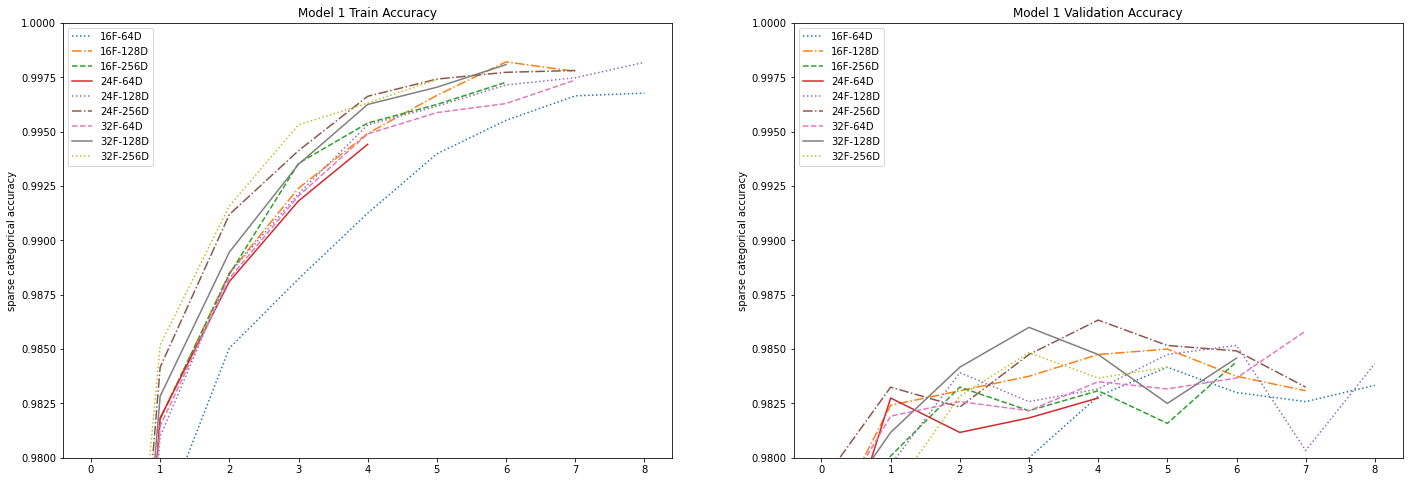

In [128]:
names = ["16F-64D", "16F-128D", "16F-256D",
         "24F-64D", "24F-128D", "24F-256D",
         "32F-64D", "32F-128D", "32F-256D"]


plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
for i in range(9):
    plt.plot(history1[i].history['sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Model 1 Train Accuracy')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])

plt.subplot(1,2,2)
for i in range(9):
    plt.plot(history1[i].history['val_sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Model 1 Validation Accuracy')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])

plt.savefig('model1_mnist.png')
plt.show();


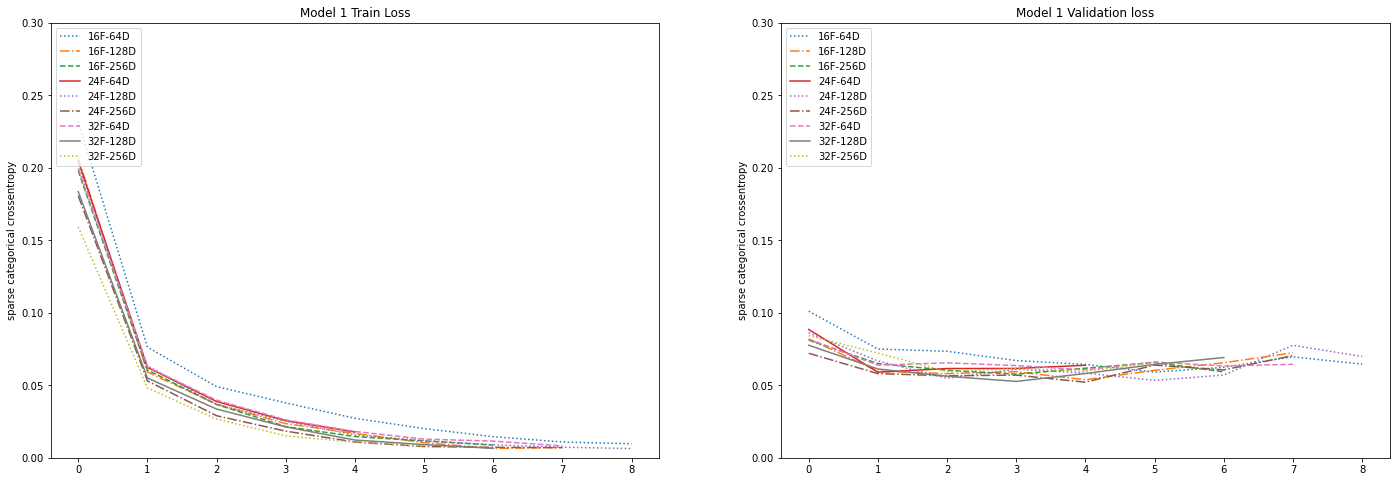

In [129]:
plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
for i in range(9):
    plt.plot(history1[i].history['loss'],linestyle=styles[i])

plt.title('Model 1 Train Loss')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.0,0.3])

plt.subplot(1,2,2)
for i in range(9):
    plt.plot(history1[i].history['val_loss'],linestyle=styles[i])

plt.title('Model 1 Validation loss')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.0,0.3])


plt.savefig('model1_loss_mnist.png')
plt.show();


**Evaluate Model 1s**

In [36]:
loss1 = np.zeros(9)
accuracy1= np.zeros(9)
for i in range(9):
  loss1[i], accuracy1[i] = c_model1[i].evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9844


In [37]:
display(Markdown(f"This 1 CONV2D layer architecture gives a test accuracy centered around {np.mean(accuracy1) :.3f}"),
        Markdown(f"The minimum is {min(accuracy1):.4f} and the maximum is {max(accuracy1) :.4f}"))

This 1 CONV2D layer architecture gives a test accuracy centered around 0.985

The minimum is 0.9837 and the maximum is 0.9868

**Build and train Model 2s**

In [38]:
### 2 HIDDEN CONV2D LAYERS ###
c_model2 = [0]*nets
history2 = [0]* nets

start_full2 = time.time()

i = 0 
for j in range(3):
  for k in range(3):
      c_model2[i] = tf.keras.Sequential()
      c_model2[i].add(tf.keras.layers.Conv2D(filter[j],kernel_size=5,padding='same',activation='relu',
              input_shape=(28,28,1)))
      c_model2[i].add(tf.keras.layers.Conv2D(filter[j],kernel_size=5,padding='same',activation='relu'))
      
      c_model2[i].add(tf.keras.layers.Flatten())
      c_model2[i].add(tf.keras.layers.Dense(dense[k], activation='relu'))
      c_model2[i].add(tf.keras.layers.Dense(10, activation='softmax'))

      c_model2[i].compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
        
      start = time.time()
      history2[i] =  c_model2[i].fit(x_train, y_train, validation_split= 0.2,  epochs=100, batch_size=128, callbacks = [early_stop])
      end = time.time()
      display(Markdown(f"**Training time for {len(history2[i].epoch)} epochs**: {(end-start): .3f}s"))

      i += 1

end_full2 = time.time()

Epoch 1/100
375/375 [==============================] - 28s 74ms/step - loss: 0.2019 - sparse_categorical_accuracy: 0.9403 - val_loss: 0.0886 - val_sparse_categorical_accuracy: 0.9751
Epoch 2/100
375/375 [==============================] - 28s 74ms/step - loss: 0.0613 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9829
Epoch 3/100
375/375 [==============================] - 28s 75ms/step - loss: 0.0402 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.0542 - val_sparse_categorical_accuracy: 0.9847
Epoch 4/100
375/375 [==============================] - 28s 74ms/step - loss: 0.0280 - sparse_categorical_accuracy: 0.9909 - val_loss: 0.0540 - val_sparse_categorical_accuracy: 0.9838
Epoch 5/100
375/375 [==============================] - 28s 74ms/step - loss: 0.0203 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0448 - val_sparse_categorical_accuracy: 0.9881
Epoch 6/100
375/375 [==============================] - 27s 72ms/step - loss: 0.0160 -

**Training time for 8 epochs**:  221.067s

Epoch 1/100
375/375 [==============================] - 30s 78ms/step - loss: 0.1756 - sparse_categorical_accuracy: 0.9484 - val_loss: 0.0596 - val_sparse_categorical_accuracy: 0.9821
Epoch 2/100
375/375 [==============================] - 30s 79ms/step - loss: 0.0536 - sparse_categorical_accuracy: 0.9839 - val_loss: 0.0599 - val_sparse_categorical_accuracy: 0.9822
Epoch 3/100
375/375 [==============================] - 29s 78ms/step - loss: 0.0333 - sparse_categorical_accuracy: 0.9902 - val_loss: 0.0451 - val_sparse_categorical_accuracy: 0.9872
Epoch 4/100
375/375 [==============================] - 29s 77ms/step - loss: 0.0240 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.0551 - val_sparse_categorical_accuracy: 0.9827
Epoch 5/100
375/375 [==============================] - 29s 77ms/step - loss: 0.0156 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0578 - val_sparse_categorical_accuracy: 0.9841
Epoch 6/100
375/375 [==============================] - 29s 78ms/step - loss: 0.0113 -

**Training time for 6 epochs**:  175.667s

Epoch 1/100
375/375 [==============================] - 31s 82ms/step - loss: 0.1667 - sparse_categorical_accuracy: 0.9511 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9818
Epoch 2/100
375/375 [==============================] - 31s 83ms/step - loss: 0.0469 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0502 - val_sparse_categorical_accuracy: 0.9854
Epoch 3/100
375/375 [==============================] - 31s 82ms/step - loss: 0.0287 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0452 - val_sparse_categorical_accuracy: 0.9872
Epoch 4/100
375/375 [==============================] - 31s 82ms/step - loss: 0.0195 - sparse_categorical_accuracy: 0.9932 - val_loss: 0.0462 - val_sparse_categorical_accuracy: 0.9883
Epoch 5/100
375/375 [==============================] - 31s 82ms/step - loss: 0.0125 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.0463 - val_sparse_categorical_accuracy: 0.9876
Epoch 6/100
375/375 [==============================] - 31s 82ms/step - loss: 0.0094 -

**Training time for 6 epochs**:  185.150s

Epoch 1/100
375/375 [==============================] - 39s 104ms/step - loss: 0.1765 - sparse_categorical_accuracy: 0.9472 - val_loss: 0.0787 - val_sparse_categorical_accuracy: 0.9761
Epoch 2/100
375/375 [==============================] - 40s 106ms/step - loss: 0.0520 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0475 - val_sparse_categorical_accuracy: 0.9872
Epoch 3/100
375/375 [==============================] - 40s 106ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.0445 - val_sparse_categorical_accuracy: 0.9867
Epoch 4/100
375/375 [==============================] - 40s 105ms/step - loss: 0.0223 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.0507 - val_sparse_categorical_accuracy: 0.9869
Epoch 5/100
375/375 [==============================] - 40s 106ms/step - loss: 0.0173 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.0511 - val_sparse_categorical_accuracy: 0.9865
Epoch 6/100
375/375 [==============================] - 40s 106ms/step - loss: 0.

**Training time for 6 epochs**:  237.461s

Epoch 1/100
375/375 [==============================] - 42s 112ms/step - loss: 0.1600 - sparse_categorical_accuracy: 0.9515 - val_loss: 0.0728 - val_sparse_categorical_accuracy: 0.9784
Epoch 2/100
375/375 [==============================] - 41s 110ms/step - loss: 0.0464 - sparse_categorical_accuracy: 0.9856 - val_loss: 0.0598 - val_sparse_categorical_accuracy: 0.9825
Epoch 3/100
375/375 [==============================] - 41s 110ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9906 - val_loss: 0.0450 - val_sparse_categorical_accuracy: 0.9881
Epoch 4/100
375/375 [==============================] - 42s 111ms/step - loss: 0.0215 - sparse_categorical_accuracy: 0.9929 - val_loss: 0.0542 - val_sparse_categorical_accuracy: 0.9852
Epoch 5/100
375/375 [==============================] - 41s 110ms/step - loss: 0.0138 - sparse_categorical_accuracy: 0.9955 - val_loss: 0.0557 - val_sparse_categorical_accuracy: 0.9860
Epoch 6/100
375/375 [==============================] - 41s 109ms/step - loss: 0.

**Training time for 6 epochs**:  248.503s

Epoch 1/100
375/375 [==============================] - 45s 118ms/step - loss: 0.1455 - sparse_categorical_accuracy: 0.9540 - val_loss: 0.0562 - val_sparse_categorical_accuracy: 0.9835
Epoch 2/100
375/375 [==============================] - 45s 119ms/step - loss: 0.0405 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.0466 - val_sparse_categorical_accuracy: 0.9868
Epoch 3/100
375/375 [==============================] - 44s 118ms/step - loss: 0.0236 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.0449 - val_sparse_categorical_accuracy: 0.9870
Epoch 4/100
375/375 [==============================] - 44s 118ms/step - loss: 0.0154 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.0468 - val_sparse_categorical_accuracy: 0.9869
Epoch 5/100
375/375 [==============================] - 45s 119ms/step - loss: 0.0111 - sparse_categorical_accuracy: 0.9965 - val_loss: 0.0385 - val_sparse_categorical_accuracy: 0.9895
Epoch 6/100
375/375 [==============================] - 45s 119ms/step - loss: 0.

**Training time for 8 epochs**:  355.882s

Epoch 1/100
375/375 [==============================] - 59s 158ms/step - loss: 0.1773 - sparse_categorical_accuracy: 0.9459 - val_loss: 0.0673 - val_sparse_categorical_accuracy: 0.9808
Epoch 2/100
375/375 [==============================] - 60s 160ms/step - loss: 0.0501 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0540 - val_sparse_categorical_accuracy: 0.9829
Epoch 3/100
375/375 [==============================] - 59s 158ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9902 - val_loss: 0.0472 - val_sparse_categorical_accuracy: 0.9862
Epoch 4/100
375/375 [==============================] - 59s 159ms/step - loss: 0.0229 - sparse_categorical_accuracy: 0.9927 - val_loss: 0.0550 - val_sparse_categorical_accuracy: 0.9847
Epoch 5/100
375/375 [==============================] - 59s 159ms/step - loss: 0.0152 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0550 - val_sparse_categorical_accuracy: 0.9838
Epoch 6/100
375/375 [==============================] - 60s 159ms/step - loss: 0.

**Training time for 9 epochs**:  528.777s

Epoch 1/100
375/375 [==============================] - 62s 164ms/step - loss: 0.1538 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.0635 - val_sparse_categorical_accuracy: 0.9812
Epoch 2/100
375/375 [==============================] - 62s 164ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0544 - val_sparse_categorical_accuracy: 0.9837
Epoch 3/100
375/375 [==============================] - 62s 164ms/step - loss: 0.0271 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.0431 - val_sparse_categorical_accuracy: 0.9875
Epoch 4/100
375/375 [==============================] - 61s 163ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9941 - val_loss: 0.0496 - val_sparse_categorical_accuracy: 0.9869
Epoch 5/100
375/375 [==============================] - 61s 163ms/step - loss: 0.0125 - sparse_categorical_accuracy: 0.9959 - val_loss: 0.0509 - val_sparse_categorical_accuracy: 0.9877
Epoch 6/100
375/375 [==============================] - 61s 163ms/step - loss: 0.

**Training time for 6 epochs**:  368.315s

Epoch 1/100
375/375 [==============================] - 68s 180ms/step - loss: 0.1384 - sparse_categorical_accuracy: 0.9575 - val_loss: 0.0516 - val_sparse_categorical_accuracy: 0.9843
Epoch 2/100
375/375 [==============================] - 67s 180ms/step - loss: 0.0388 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.0413 - val_sparse_categorical_accuracy: 0.9875
Epoch 3/100
375/375 [==============================] - 66s 175ms/step - loss: 0.0222 - sparse_categorical_accuracy: 0.9925 - val_loss: 0.0458 - val_sparse_categorical_accuracy: 0.9873
Epoch 4/100
375/375 [==============================] - 66s 176ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0593 - val_sparse_categorical_accuracy: 0.9834
Epoch 5/100
375/375 [==============================] - 66s 176ms/step - loss: 0.0096 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.0496 - val_sparse_categorical_accuracy: 0.9868


**Training time for 5 epochs**:  332.587s

In [39]:
display(Markdown(f"**Total training time for 9 Model 2s**: {(end_full2-start_full2): .3f}s"))

**Total training time for 9 Model 2s**:  2653.859s

In [40]:
for i in range(9):
  tf.keras.utils.plot_model(c_model2[i], f'c_model2{i}.png', show_shapes=True) 
  # all model str saved in file dir
  print(c_model2[i].summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        6416      
                                                                 
 flatten_15 (Flatten)        (None, 12544)             0         
                                                                 
 dense_36 (Dense)            (None, 64)                802880    
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 810,362
Trainable params: 810,362
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_16"
___________________

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 flatten_23 (Flatten)        (None, 25088)             0         
                                                                 
 dense_52 (Dense)            (None, 256)               6422784   
                                                                 
 dense_53 (Dense)            (None, 10)                2570      
                                                                 
Total params: 6,451,818
Trainable params: 6,451,818
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
i = 0
t_epochs = np.zeros(9)
for j in range(3):
  for k in range(3):
    t_epochs[i] = len(history2[i].epoch)
    display(Markdown(f"**Model2_{i} parameters:** {filter[j]} filters, {dense[k]} dense units"),
            Markdown(f"For Model2_{i}, it took {t_epochs[i]} epochs to converge "))
    i +=1

display(Markdown(f"The shortest was {min(t_epochs)} and the longest was {max(t_epochs)} for Model 2"))


**Model2_0 parameters:** 16 filters, 64 dense units

For Model2_0, it took 8.0 epochs to converge 

**Model2_1 parameters:** 16 filters, 128 dense units

For Model2_1, it took 6.0 epochs to converge 

**Model2_2 parameters:** 16 filters, 256 dense units

For Model2_2, it took 6.0 epochs to converge 

**Model2_3 parameters:** 24 filters, 64 dense units

For Model2_3, it took 6.0 epochs to converge 

**Model2_4 parameters:** 24 filters, 128 dense units

For Model2_4, it took 6.0 epochs to converge 

**Model2_5 parameters:** 24 filters, 256 dense units

For Model2_5, it took 8.0 epochs to converge 

**Model2_6 parameters:** 32 filters, 64 dense units

For Model2_6, it took 9.0 epochs to converge 

**Model2_7 parameters:** 32 filters, 128 dense units

For Model2_7, it took 6.0 epochs to converge 

**Model2_8 parameters:** 32 filters, 256 dense units

For Model2_8, it took 5.0 epochs to converge 

The shortest was 5.0 and the longest was 9.0 for Model 2

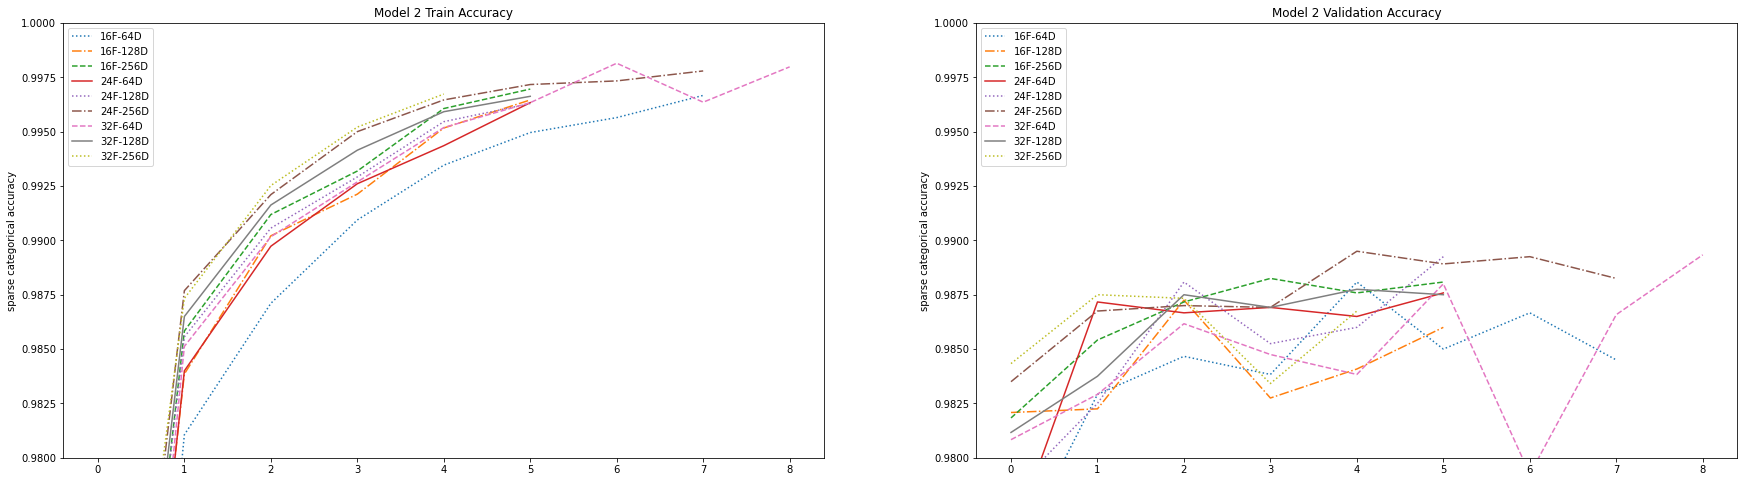

In [130]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
for i in range(9):
    plt.plot(history2[i].history['sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Model 2 Train Accuracy')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])

plt.subplot(1,2,2)
for i in range(9):
    plt.plot(history2[i].history['val_sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Model 2 Validation Accuracy')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])


plt.savefig('model2_mnist.png')
plt.show();


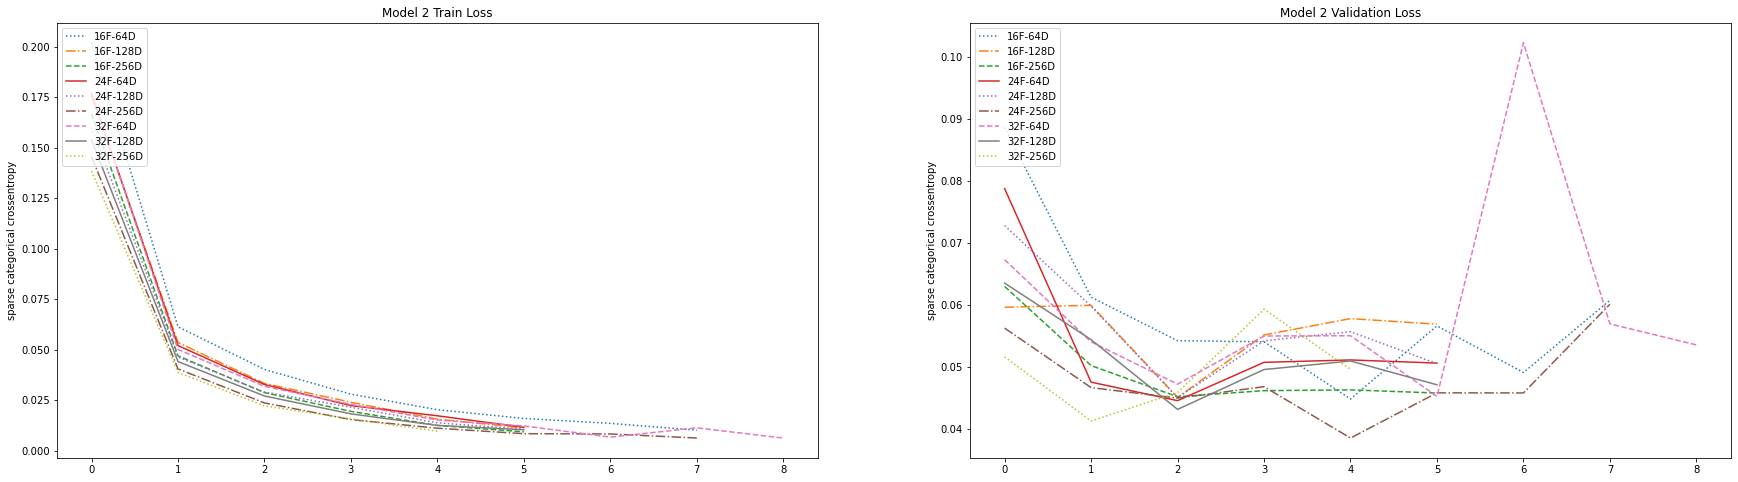

In [131]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
for i in range(9):
    plt.plot(history2[i].history['loss'],linestyle=styles[i])

plt.title('Model 2 Train Loss')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])

plt.subplot(1,2,2)
for i in range(9):
    plt.plot(history2[i].history['val_loss'],linestyle=styles[i])

plt.title('Model 2 Validation Loss')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])


plt.savefig('model2_loss_mnist.png')
plt.show();


**Evaluate Model 2s**

In [47]:
loss2 = np.zeros(9)
accuracy2= np.zeros(9)
for i in range(9):
  loss2[i], accuracy2[i] = c_model2[i].evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9867


In [48]:
display(Markdown(f"This 2 CONV2D layer architecture gives a test accuracy centered around {np.mean(accuracy2) :.3f}"),
        Markdown(f"The minimum is {min(accuracy2):.4f} and the maximum is {max(accuracy2) :.4f}"))

This 2 CONV2D layer architecture gives a test accuracy centered around 0.988

The minimum is 0.9867 and the maximum is 0.9897

**Build and Train Model 3s**

In [49]:
### 3 HIDDEN CONV2D LAYERS ###
c_model3 = [0]*nets
history3 = [0]*nets


start_full3= time.time()

i = 0
for j in range(3):
  for k in range(3):
      c_model3[i] = tf.keras.Sequential()
      c_model3[i].add(tf.keras.layers.Conv2D(filter[j],kernel_size=5,padding='same',activation='relu',
              input_shape=(28,28,1)))
      c_model3[i].add(tf.keras.layers.Conv2D(filter[j],kernel_size=5,padding='same',activation='relu'))
      c_model3[i].add(tf.keras.layers.Conv2D(filter[j],kernel_size=5,padding='same',activation='relu'))

      c_model3[i].add(tf.keras.layers.Flatten())
      c_model3[i].add(tf.keras.layers.Dense(dense[k], activation='relu'))
      c_model3[i].add(tf.keras.layers.Dense(10, activation='softmax'))

      c_model3[i].compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

      start = time.time()
      history3[i] =  c_model3[i].fit(x_train, y_train, validation_split= 0.2,  epochs=100, batch_size=128, callbacks = [early_stop])
      end = time.time()
      display(Markdown(f"**Training time for {len(history3[i].epoch)} epochs**: {(end-start): .3f}s"))

      i += 1
   
end_full3= time.time()

Epoch 1/100
375/375 [==============================] - 49s 128ms/step - loss: 0.2001 - sparse_categorical_accuracy: 0.9392 - val_loss: 0.0695 - val_sparse_categorical_accuracy: 0.9790
Epoch 2/100
375/375 [==============================] - 48s 127ms/step - loss: 0.0562 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0514 - val_sparse_categorical_accuracy: 0.9850
Epoch 3/100
375/375 [==============================] - 47s 125ms/step - loss: 0.0384 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0539 - val_sparse_categorical_accuracy: 0.9842
Epoch 4/100
375/375 [==============================] - 46s 122ms/step - loss: 0.0251 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.0516 - val_sparse_categorical_accuracy: 0.9852
Epoch 5/100
375/375 [==============================] - 45s 121ms/step - loss: 0.0177 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.0455 - val_sparse_categorical_accuracy: 0.9884
Epoch 6/100
375/375 [==============================] - 46s 122ms/step - loss: 0.

**Training time for 8 epochs**:  370.875s

Epoch 1/100
375/375 [==============================] - 49s 129ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.9495 - val_loss: 0.0765 - val_sparse_categorical_accuracy: 0.9776
Epoch 2/100
375/375 [==============================] - 49s 130ms/step - loss: 0.0498 - sparse_categorical_accuracy: 0.9845 - val_loss: 0.0484 - val_sparse_categorical_accuracy: 0.9858
Epoch 3/100
375/375 [==============================] - 49s 131ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0519 - val_sparse_categorical_accuracy: 0.9853
Epoch 4/100
375/375 [==============================] - 49s 130ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9927 - val_loss: 0.0589 - val_sparse_categorical_accuracy: 0.9843
Epoch 5/100
375/375 [==============================] - 49s 130ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9942 - val_loss: 0.0461 - val_sparse_categorical_accuracy: 0.9883
Epoch 6/100
375/375 [==============================] - 49s 129ms/step - loss: 0.

**Training time for 8 epochs**:  390.225s

Epoch 1/100
375/375 [==============================] - 52s 138ms/step - loss: 0.1621 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.0737 - val_sparse_categorical_accuracy: 0.9792
Epoch 2/100
375/375 [==============================] - 51s 137ms/step - loss: 0.0466 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0480 - val_sparse_categorical_accuracy: 0.9861
Epoch 3/100
375/375 [==============================] - 51s 137ms/step - loss: 0.0293 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.0435 - val_sparse_categorical_accuracy: 0.9877
Epoch 4/100
375/375 [==============================] - 51s 136ms/step - loss: 0.0183 - sparse_categorical_accuracy: 0.9940 - val_loss: 0.0447 - val_sparse_categorical_accuracy: 0.9875
Epoch 5/100
375/375 [==============================] - 51s 136ms/step - loss: 0.0156 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.0509 - val_sparse_categorical_accuracy: 0.9846
Epoch 6/100
375/375 [==============================] - 52s 139ms/step - loss: 0.

**Training time for 9 epochs**:  463.984s

Epoch 1/100
375/375 [==============================] - 69s 184ms/step - loss: 0.1751 - sparse_categorical_accuracy: 0.9470 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9805
Epoch 2/100
375/375 [==============================] - 69s 185ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9849 - val_loss: 0.0449 - val_sparse_categorical_accuracy: 0.9870
Epoch 3/100
375/375 [==============================] - 69s 184ms/step - loss: 0.0313 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.0460 - val_sparse_categorical_accuracy: 0.9853
Epoch 4/100
375/375 [==============================] - 69s 183ms/step - loss: 0.0207 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0596 - val_sparse_categorical_accuracy: 0.9853
Epoch 5/100
375/375 [==============================] - 69s 184ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9941 - val_loss: 0.0503 - val_sparse_categorical_accuracy: 0.9865


**Training time for 5 epochs**:  345.358s

Epoch 1/100
375/375 [==============================] - 72s 192ms/step - loss: 0.1580 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.0615 - val_sparse_categorical_accuracy: 0.9823
Epoch 2/100
375/375 [==============================] - 71s 190ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0502 - val_sparse_categorical_accuracy: 0.9851
Epoch 3/100
375/375 [==============================] - 72s 191ms/step - loss: 0.0270 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0435 - val_sparse_categorical_accuracy: 0.9868
Epoch 4/100
375/375 [==============================] - 72s 191ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9941 - val_loss: 0.0514 - val_sparse_categorical_accuracy: 0.9864
Epoch 5/100
375/375 [==============================] - 72s 192ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9953 - val_loss: 0.0500 - val_sparse_categorical_accuracy: 0.9872
Epoch 6/100
375/375 [==============================] - 72s 192ms/step - loss: 0.

**Training time for 9 epochs**:  644.210s

Epoch 1/100
375/375 [==============================] - 75s 201ms/step - loss: 0.1457 - sparse_categorical_accuracy: 0.9544 - val_loss: 0.0586 - val_sparse_categorical_accuracy: 0.9822
Epoch 2/100
375/375 [==============================] - 74s 198ms/step - loss: 0.0409 - sparse_categorical_accuracy: 0.9869 - val_loss: 0.0435 - val_sparse_categorical_accuracy: 0.9877
Epoch 3/100
375/375 [==============================] - 74s 198ms/step - loss: 0.0258 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.0506 - val_sparse_categorical_accuracy: 0.9850
Epoch 4/100
375/375 [==============================] - 75s 199ms/step - loss: 0.0168 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.0457 - val_sparse_categorical_accuracy: 0.9878
Epoch 5/100
375/375 [==============================] - 74s 197ms/step - loss: 0.0130 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.0426 - val_sparse_categorical_accuracy: 0.9884
Epoch 6/100
375/375 [==============================] - 75s 200ms/step - loss: 0.

**Training time for 8 epochs**:  595.575s

Epoch 1/100
375/375 [==============================] - 107s 284ms/step - loss: 0.1581 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.0566 - val_sparse_categorical_accuracy: 0.9836
Epoch 2/100
375/375 [==============================] - 107s 286ms/step - loss: 0.0420 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.0394 - val_sparse_categorical_accuracy: 0.9879
Epoch 3/100
375/375 [==============================] - 107s 284ms/step - loss: 0.0259 - sparse_categorical_accuracy: 0.9915 - val_loss: 0.0430 - val_sparse_categorical_accuracy: 0.9886
Epoch 4/100
375/375 [==============================] - 107s 285ms/step - loss: 0.0194 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0435 - val_sparse_categorical_accuracy: 0.9867
Epoch 5/100
375/375 [==============================] - 108s 288ms/step - loss: 0.0144 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.0481 - val_sparse_categorical_accuracy: 0.9872


**Training time for 5 epochs**:  535.577s

Epoch 1/100
375/375 [==============================] - 109s 291ms/step - loss: 0.1602 - sparse_categorical_accuracy: 0.9515 - val_loss: 0.0565 - val_sparse_categorical_accuracy: 0.9832
Epoch 2/100
375/375 [==============================] - 108s 288ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0469 - val_sparse_categorical_accuracy: 0.9868
Epoch 3/100
375/375 [==============================] - 108s 287ms/step - loss: 0.0287 - sparse_categorical_accuracy: 0.9909 - val_loss: 0.0421 - val_sparse_categorical_accuracy: 0.9883
Epoch 4/100
375/375 [==============================] - 107s 286ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9930 - val_loss: 0.0378 - val_sparse_categorical_accuracy: 0.9880
Epoch 5/100
375/375 [==============================] - 107s 286ms/step - loss: 0.0146 - sparse_categorical_accuracy: 0.9953 - val_loss: 0.0490 - val_sparse_categorical_accuracy: 0.9876
Epoch 6/100
375/375 [==============================] - 107s 286ms/step - lo

**Training time for 7 epochs**:  753.982s

Epoch 1/100
375/375 [==============================] - 115s 306ms/step - loss: 0.1408 - sparse_categorical_accuracy: 0.9564 - val_loss: 0.0568 - val_sparse_categorical_accuracy: 0.9832
Epoch 2/100
375/375 [==============================] - 114s 304ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.0360 - val_sparse_categorical_accuracy: 0.9899
Epoch 3/100
375/375 [==============================] - 114s 303ms/step - loss: 0.0252 - sparse_categorical_accuracy: 0.9919 - val_loss: 0.0399 - val_sparse_categorical_accuracy: 0.9882
Epoch 4/100
375/375 [==============================] - 114s 303ms/step - loss: 0.0164 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.0373 - val_sparse_categorical_accuracy: 0.9901
Epoch 5/100
375/375 [==============================] - 113s 302ms/step - loss: 0.0123 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.0410 - val_sparse_categorical_accuracy: 0.9883


**Training time for 5 epochs**:  569.608s

In [50]:
display(Markdown(f"**Total training time for 9 Model 3s**: {(end_full3-start_full3): .3f}s"))

**Total training time for 9 Model 3s**:  4669.898s

In [51]:
for i in range(9):
  tf.keras.utils.plot_model(c_model3[i], f'c_model3{i}.png', show_shapes=True) 
  # all model str saved in file dir
  print(c_model3[i].summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        6416      
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 16)        6416      
                                                                 
 flatten_24 (Flatten)        (None, 12544)             0         
                                                                 
 dense_54 (Dense)            (None, 64)                802880    
                                                                 
 dense_55 (Dense)            (None, 10)                650       
                                                                 
Total params: 816,778
Trainable params: 816,778
Non-t

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 flatten_31 (Flatten)        (None, 25088)             0         
                                                                 
 dense_68 (Dense)            (None, 128)               3211392   
                                                                 
 dense_69 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,264,778
Trainable params: 3,264,778
N

In [52]:
i = 0
t_epochs = np.zeros(9)
for j in range(3):
  for k in range(3):
    t_epochs[i] = len(history3[i].epoch)
    display(Markdown(f"**Model3_{i} parameters:** {filter[j]} filters, {dense[k]} dense units"),
            Markdown(f"For Model3_{i}, it took {t_epochs[i]} epochs to converge "))
    i +=1

display(Markdown(f"The shortest was {min(t_epochs)} and the longest was {max(t_epochs)} for Model 3"))


**Model3_0 parameters:** 16 filters, 64 dense units

For Model3_0, it took 8.0 epochs to converge 

**Model3_1 parameters:** 16 filters, 128 dense units

For Model3_1, it took 8.0 epochs to converge 

**Model3_2 parameters:** 16 filters, 256 dense units

For Model3_2, it took 9.0 epochs to converge 

**Model3_3 parameters:** 24 filters, 64 dense units

For Model3_3, it took 5.0 epochs to converge 

**Model3_4 parameters:** 24 filters, 128 dense units

For Model3_4, it took 9.0 epochs to converge 

**Model3_5 parameters:** 24 filters, 256 dense units

For Model3_5, it took 8.0 epochs to converge 

**Model3_6 parameters:** 32 filters, 64 dense units

For Model3_6, it took 5.0 epochs to converge 

**Model3_7 parameters:** 32 filters, 128 dense units

For Model3_7, it took 7.0 epochs to converge 

**Model3_8 parameters:** 32 filters, 256 dense units

For Model3_8, it took 5.0 epochs to converge 

The shortest was 5.0 and the longest was 9.0 for Model 3

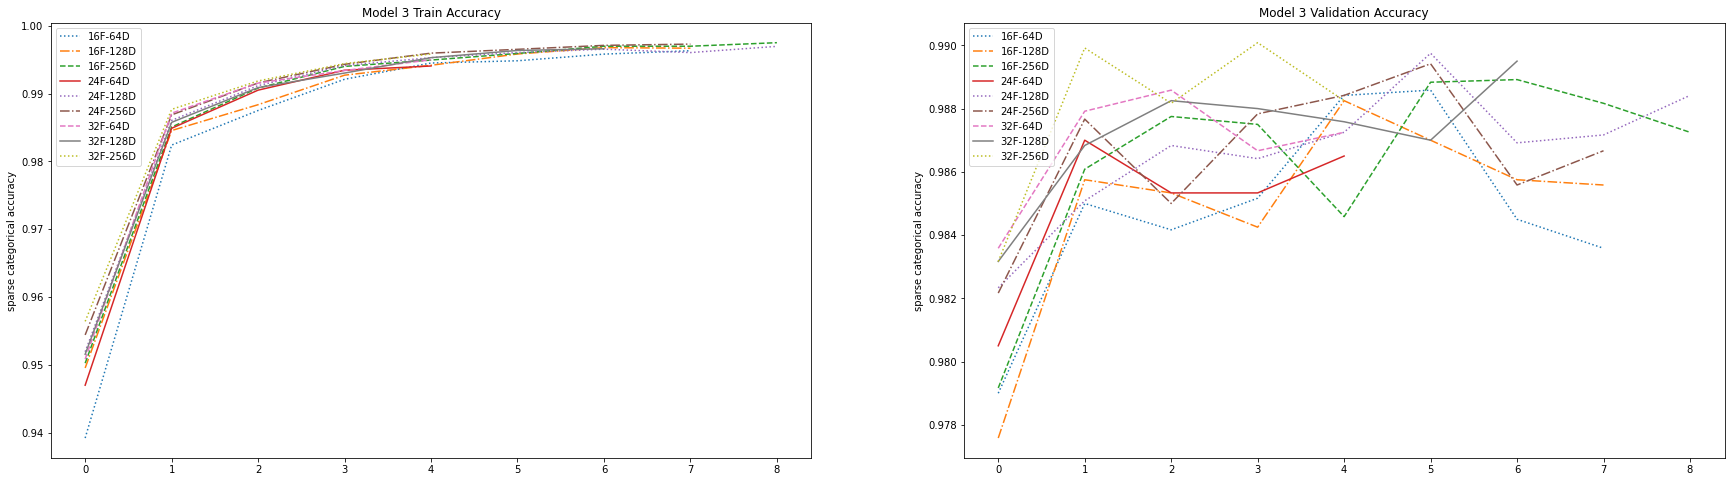

In [132]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
for i in range(9):
    plt.plot(history3[i].history['sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Model 3 Train Accuracy')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])

plt.subplot(1,2,2)
for i in range(9):
    plt.plot(history3[i].history['val_sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Model 3 Validation Accuracy')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])


plt.savefig('model3_mnist.png');
plt.show();


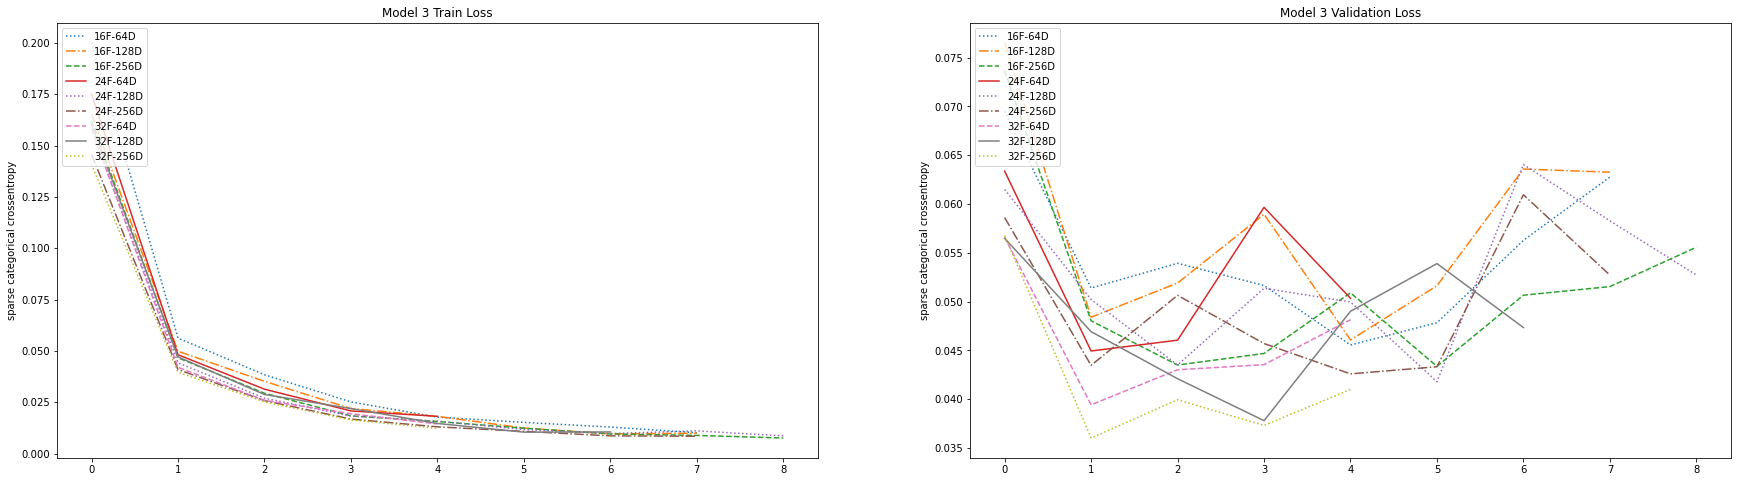

In [133]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
for i in range(9):
    plt.plot(history3[i].history['loss'],linestyle=styles[i])

plt.title('Model 3 Train Loss')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])

plt.subplot(1,2,2)
for i in range(9):
    plt.plot(history3[i].history['val_loss'],linestyle=styles[i])

plt.title('Model 3 Validation Loss')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])


plt.savefig('model3_loss_mnist.png')
plt.show();


**Evaluate Model 3s**

In [ ]:
loss = np.zeros(9)
accuracy= np.zeros(9)
for i in range(9):
  loss[i], accuracy[i] = c_model3[i].evaluate(x_test, y_test)

313/313 [==============================] - 23s 73ms/step - loss: 0.0344 - sparse_categorical_accuracy: 0.9898


In [ ]:
display(Markdown(f"This 3 CONV2D layer architecture gives a test accuracy centered around {np.mean(accuracy) :.3f}"),
        Markdown(f"The minimum is {min(accuracy):.4f} and the maximum is {max(accuracy) :.4f}"))

This 2 CONV2D layer architecture gives a test accuracy centered around 0.989

The minimum is 0.9863 and the maximum is 0.9909

After training 27 different models, we are going to select a single model for further steps. This is mainly because of computational cost. Since the 27 models above are trained with no regularization (drop out, max pool, batch normalization) and with default optimizer of Adam with learning rate 1e-3, it would be unreasonable and inefficient to train all 27 models in further steps.

If we find the best model within the 27 models and use that to tune other design choices, it would save computation time by a lot. 

Comparing the overall average test accuracy for each of the 3 model architectures, 3 layers is slightly better than 2 layers. However, considering computational cost, having 2 layers is more reasonable than having 3 layers.

For 9 Model 3s, the training time was 19963.165s(5.55 hrs) while 10717.457s(2.98 hrs) for 9 Model 2s.

So we select 2 hidden convolution layers as our network architecture.

Among the 9 filter and dense unit size combinations in Model 2, 24 feature maps and 256 dense units seem to be the best. 32 maps and 64 units come second. 

### Regularization: Drop Out Rate

In [55]:
from gc import callbacks
#INTIALIZATION of dropout percentage
nets = 6
d_model = [0]*nets
output_list = []

start_full_d = time.time()

for j in range(6):
    d_model[j] = tf.keras.models.Sequential()
    d_model[j].add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu',
              input_shape=(28,28,1)))
    d_model[j].add(tf.keras.layers.Dropout(j*0.1))

    d_model[j].add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu'))
    d_model[j].add(tf.keras.layers.Dropout(j*0.1))

    d_model[j].add(tf.keras.layers.Flatten())
    d_model[j].add(tf.keras.layers.Dense(256, activation='relu'))
    d_model[j].add(tf.keras.layers.Dropout(j*0.1))

    d_model[j].add(tf.keras.layers.Dense(10, activation='softmax'))

    d_model[j].compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

    start = time.time()
    output_list.append(d_model[j].fit(x_train, y_train, epochs=100, batch_size=128, validation_split = 0.2, callbacks = [early_stop]))
    end = time.time()

    display(Markdown(f"**Training time for {len(output_list[j].epoch)} epochs**: {(end-start): .3f}s"))

end_full_d = time.time()

Epoch 1/100
375/375 [==============================] - 47s 125ms/step - loss: 0.1501 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.0574 - val_sparse_categorical_accuracy: 0.9828
Epoch 2/100
375/375 [==============================] - 46s 124ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.0527 - val_sparse_categorical_accuracy: 0.9842
Epoch 3/100
375/375 [==============================] - 46s 122ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0504 - val_sparse_categorical_accuracy: 0.9862
Epoch 4/100
375/375 [==============================] - 45s 121ms/step - loss: 0.0175 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.0410 - val_sparse_categorical_accuracy: 0.9893
Epoch 5/100
375/375 [==============================] - 45s 119ms/step - loss: 0.0120 - sparse_categorical_accuracy: 0.9956 - val_loss: 0.0486 - val_sparse_categorical_accuracy: 0.9860
Epoch 6/100
375/375 [==============================] - 45s 119ms/step - loss: 0.

**Training time for 7 epochs**:  318.344s

Epoch 1/100
375/375 [==============================] - 53s 141ms/step - loss: 0.1596 - sparse_categorical_accuracy: 0.9501 - val_loss: 0.0545 - val_sparse_categorical_accuracy: 0.9832
Epoch 2/100
375/375 [==============================] - 53s 142ms/step - loss: 0.0455 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0466 - val_sparse_categorical_accuracy: 0.9868
Epoch 3/100
375/375 [==============================] - 53s 141ms/step - loss: 0.0292 - sparse_categorical_accuracy: 0.9904 - val_loss: 0.0498 - val_sparse_categorical_accuracy: 0.9853
Epoch 4/100
375/375 [==============================] - 53s 142ms/step - loss: 0.0193 - sparse_categorical_accuracy: 0.9936 - val_loss: 0.0390 - val_sparse_categorical_accuracy: 0.9894
Epoch 5/100
375/375 [==============================] - 53s 141ms/step - loss: 0.0137 - sparse_categorical_accuracy: 0.9955 - val_loss: 0.0442 - val_sparse_categorical_accuracy: 0.9898
Epoch 6/100
375/375 [==============================] - 53s 141ms/step - loss: 0.

**Training time for 7 epochs**:  371.426s

Epoch 1/100
375/375 [==============================] - 53s 138ms/step - loss: 0.1768 - sparse_categorical_accuracy: 0.9461 - val_loss: 0.0636 - val_sparse_categorical_accuracy: 0.9811
Epoch 2/100
375/375 [==============================] - 52s 138ms/step - loss: 0.0521 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.0477 - val_sparse_categorical_accuracy: 0.9872
Epoch 3/100
375/375 [==============================] - 52s 138ms/step - loss: 0.0351 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0406 - val_sparse_categorical_accuracy: 0.9883
Epoch 4/100
375/375 [==============================] - 52s 139ms/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0378 - val_sparse_categorical_accuracy: 0.9902
Epoch 5/100
375/375 [==============================] - 52s 139ms/step - loss: 0.0196 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0410 - val_sparse_categorical_accuracy: 0.9885
Epoch 6/100
375/375 [==============================] - 52s 139ms/step - loss: 0.

**Training time for 7 epochs**:  364.574s

Epoch 1/100
375/375 [==============================] - 55s 146ms/step - loss: 0.1874 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9822
Epoch 2/100
375/375 [==============================] - 56s 149ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9804 - val_loss: 0.0442 - val_sparse_categorical_accuracy: 0.9868
Epoch 3/100
375/375 [==============================] - 55s 148ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.0389 - val_sparse_categorical_accuracy: 0.9887
Epoch 4/100
375/375 [==============================] - 55s 147ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9891 - val_loss: 0.0380 - val_sparse_categorical_accuracy: 0.9899
Epoch 5/100
375/375 [==============================] - 55s 146ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0.9923 - val_loss: 0.0417 - val_sparse_categorical_accuracy: 0.9880
Epoch 6/100
375/375 [==============================] - 55s 147ms/step - loss: 0.

**Training time for 7 epochs**:  385.578s

Epoch 1/100
375/375 [==============================] - 53s 141ms/step - loss: 0.2159 - sparse_categorical_accuracy: 0.9330 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9815
Epoch 2/100
375/375 [==============================] - 53s 142ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9767 - val_loss: 0.0451 - val_sparse_categorical_accuracy: 0.9868
Epoch 3/100
375/375 [==============================] - 53s 142ms/step - loss: 0.0529 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0431 - val_sparse_categorical_accuracy: 0.9872
Epoch 4/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0437 - sparse_categorical_accuracy: 0.9866 - val_loss: 0.0365 - val_sparse_categorical_accuracy: 0.9888
Epoch 5/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0357 - sparse_categorical_accuracy: 0.9890 - val_loss: 0.0375 - val_sparse_categorical_accuracy: 0.9894
Epoch 6/100
375/375 [==============================] - 53s 142ms/step - loss: 0.

**Training time for 13 epochs**:  700.419s

Epoch 1/100
375/375 [==============================] - 54s 143ms/step - loss: 0.2542 - sparse_categorical_accuracy: 0.9218 - val_loss: 0.0648 - val_sparse_categorical_accuracy: 0.9799
Epoch 2/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9709 - val_loss: 0.0480 - val_sparse_categorical_accuracy: 0.9861
Epoch 3/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0713 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.0441 - val_sparse_categorical_accuracy: 0.9864
Epoch 4/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0564 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0399 - val_sparse_categorical_accuracy: 0.9889
Epoch 5/100
375/375 [==============================] - 53s 142ms/step - loss: 0.0484 - sparse_categorical_accuracy: 0.9849 - val_loss: 0.0393 - val_sparse_categorical_accuracy: 0.9876
Epoch 6/100
375/375 [==============================] - 54s 144ms/step - loss: 0.

**Training time for 10 epochs**:  536.223s

In [56]:
display(Markdown(f"**Total training time for 6 Dropout Rates**: {(end_full_d-start_full_d): .3f}s; {(end_full_d - start_full_d)/60 : .3f}m;{(end_full_d - start_full_d)/3600 : .3f}h "))

**Total training time for 6 Dropout Rates**:  2676.946s;  44.616m; 0.744h 

In [57]:
for i in range(6):
  tf.keras.utils.plot_model(d_model[i], f'd_model{i}.png', show_shapes=True) 
  # all model str saved in file dir
  print(d_model[i].summary())

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 dropout (Dropout)           (None, 28, 28, 24)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 28, 28, 24)        14424     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 24)        0         
                                                                 
 flatten_33 (Flatten)        (None, 18816)             0         
                                                                 
 dense_72 (Dense)            (None, 256)               4817152   
                                                                 
 dropout_2 (Dropout)         (None, 256)             

In [134]:
t_epochs = np.zeros(6)
names = ["D= 0.0", "D= 0.1", "D= 0.2", "D=0.3", "D= 0.4", "D= 0.5", "D= 0.6"]

for i in range(6):
    t_epochs[i] = len(output_list[i].epoch)
    display(Markdown(f"**D = {names[i]} :** {t_epochs[i]} epochs to converge "))

display(Markdown(f"The shortest was {min(t_epochs)} and the longest was {max(t_epochs)}"))


**D = D= 0.0 :** 7.0 epochs to converge 

**D = D= 0.1 :** 7.0 epochs to converge 

**D = D= 0.2 :** 7.0 epochs to converge 

**D = D=0.3 :** 7.0 epochs to converge 

**D = D= 0.4 :** 13.0 epochs to converge 

**D = D= 0.5 :** 10.0 epochs to converge 

The shortest was 7.0 and the longest was 13.0

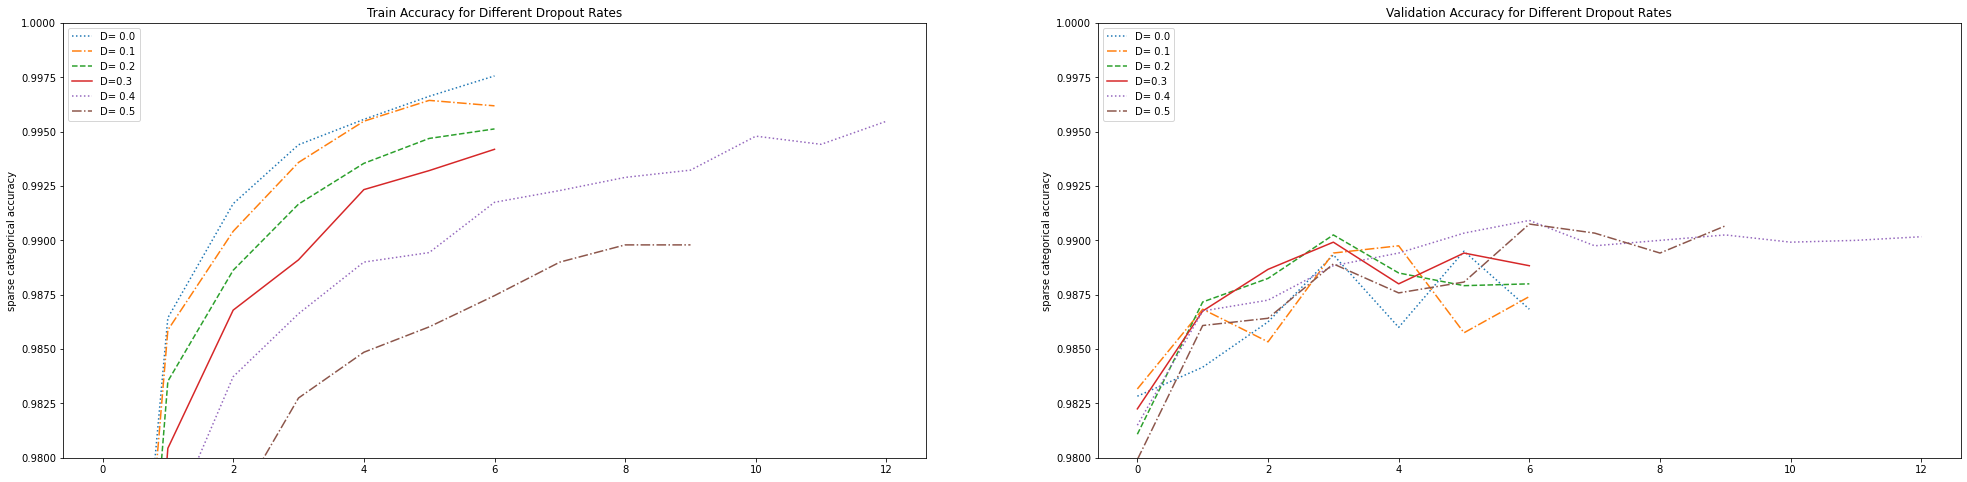

In [135]:
plt.figure(figsize=(34,8))
plt.subplot(1, 2, 1)

for i in range(6):
    plt.plot(output_list[i].history['sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Train Accuracy for Different Dropout Rates')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])

plt.subplot(1, 2, 2)
for i in range(6):
    plt.plot(output_list[i].history['val_sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Validation Accuracy for Different Dropout Rates')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1]) 

plt.savefig('droup_out_mnist.png');
plt.show()



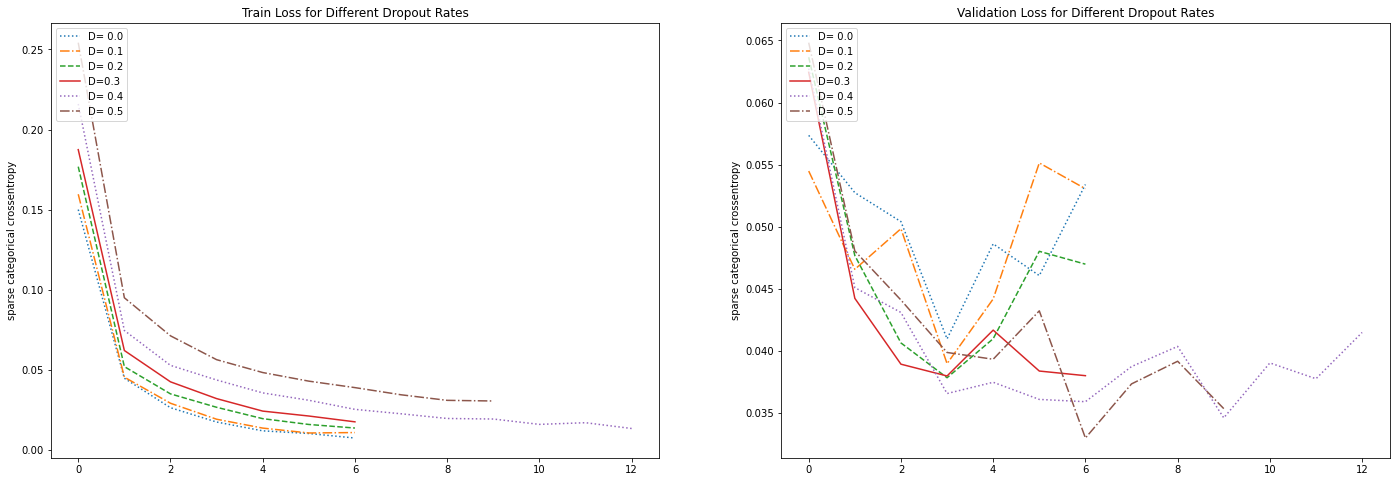

In [136]:
plt.figure(figsize=(24,8))
plt.subplot(1, 2, 1)

for i in range(6):
    plt.plot(output_list[i].history['loss'],linestyle=styles[i])

plt.title('Train Loss for Different Dropout Rates')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])

plt.subplot(1, 2, 2)
for i in range(6):
    plt.plot(output_list[i].history['val_loss'],linestyle=styles[i])

plt.title('Validation Loss for Different Dropout Rates')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1]) 

plt.savefig('droup_out_loss_mnist.png');
plt.show()



**Evaluate Dropout Models**



In [62]:
lossd = np.zeros(6)
accuracyd= np.zeros(6)
for i in range(6):
  lossd[i], accuracyd[i] = d_model[i].evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9915


In [63]:
display(Markdown(f"This 2 CONV2D layer architecture with Dropout layers gives a test accuracy centered around {np.mean(accuracyd) :.3f}"),
        Markdown(f"The minimum is {min(accuracyd):.4f} and the maximum is {max(accuracyd) :.4f}"))

This 2 CONV2D layer architecture with Dropout layers gives a test accuracy centered around 0.990

The minimum is 0.9877 and the maximum is 0.9918

For Dropout, rates of 0.0, 0.1, 0.2 are overfitting, as they have the three highest training accuacy while the lowest on validation accuracy as well as showing lower test accuracy. D = 0.3 is also slightly overfitting, as the model is underperforming on unseen data. Between D=0.4 and D=0.5, D= 0.5 seems best. Although D= 0.4's training accuracy is slightly higher, the as the validation accuracy and testing accuray seems for D=0.5 to be much similar to the training accuracy, which we can imply that the model is more stable on unseen data as well.

### Regularization: Batch Normalization

In [64]:
#regularization, adding batch_norm to model

nets = 3
b_model = [0]*nets
output_list_b = []

start_full_b = time.time()

for j in range(3):
    b_model[j] = tf.keras.models.Sequential()
    b_model[j].add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu',
          input_shape=(28,28,1)))
    if j == 0:
      b_model[j].add(tf.keras.layers.BatchNormalization())
      b_model[j].add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu'))
      b_model[j].add(tf.keras.layers.Flatten())
      b_model[j].add(tf.keras.layers.Dense(256, activation='relu'))

    if j == 1:
      b_model[j].add(tf.keras.layers.BatchNormalization())
      b_model[j].add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu'))
      b_model[j].add(tf.keras.layers.BatchNormalization())
      b_model[j].add(tf.keras.layers.Flatten())
      b_model[j].add(tf.keras.layers.Dense(256, activation='relu'))

    if j == 2:
      b_model[j].add(tf.keras.layers.BatchNormalization())
      b_model[j].add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu'))
      b_model[j].add(tf.keras.layers.BatchNormalization())
      b_model[j].add(tf.keras.layers.Flatten())
      b_model[j].add(tf.keras.layers.Dense(256, activation='relu'))
      b_model[j].add(tf.keras.layers.BatchNormalization())

    b_model[j].add(tf.keras.layers.Dense(10, activation='softmax'))
    b_model[j].compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

    start = time.time()
    output_list_b.append(b_model[j].fit(x_train, y_train, epochs=100, batch_size=128, callbacks= [early_stop], validation_split= 0.2))
    end = time.time()
    display(Markdown(f"**Training time for {len(output_list_b[j].epoch)} epochs**: {(end-start): .3f}s"))

end_full_b= time.time()

Epoch 1/100
375/375 [==============================] - 51s 136ms/step - loss: 0.2133 - sparse_categorical_accuracy: 0.9445 - val_loss: 0.3174 - val_sparse_categorical_accuracy: 0.9669
Epoch 2/100
375/375 [==============================] - 49s 130ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0628 - val_sparse_categorical_accuracy: 0.9812
Epoch 3/100
375/375 [==============================] - 49s 130ms/step - loss: 0.0246 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.0800 - val_sparse_categorical_accuracy: 0.9787
Epoch 4/100
375/375 [==============================] - 49s 131ms/step - loss: 0.0193 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0565 - val_sparse_categorical_accuracy: 0.9828
Epoch 5/100
375/375 [==============================] - 49s 131ms/step - loss: 0.0131 - sparse_categorical_accuracy: 0.9954 - val_loss: 0.0492 - val_sparse_categorical_accuracy: 0.9877
Epoch 6/100
375/375 [==============================] - 49s 131ms/step - loss: 0.

**Training time for 8 epochs**:  393.890s

Epoch 1/100
375/375 [==============================] - 54s 142ms/step - loss: 0.2280 - sparse_categorical_accuracy: 0.9489 - val_loss: 0.3862 - val_sparse_categorical_accuracy: 0.9097
Epoch 2/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0458 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0854 - val_sparse_categorical_accuracy: 0.9761
Epoch 3/100
375/375 [==============================] - 53s 142ms/step - loss: 0.0287 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0580 - val_sparse_categorical_accuracy: 0.9872
Epoch 4/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0192 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0683 - val_sparse_categorical_accuracy: 0.9848
Epoch 5/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0282 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0739 - val_sparse_categorical_accuracy: 0.9840
Epoch 6/100
375/375 [==============================] - 53s 142ms/step - loss: 0.

**Training time for 6 epochs**:  321.164s

Epoch 1/100
375/375 [==============================] - 54s 142ms/step - loss: 0.1194 - sparse_categorical_accuracy: 0.9641 - val_loss: 0.7499 - val_sparse_categorical_accuracy: 0.7670
Epoch 2/100
375/375 [==============================] - 53s 142ms/step - loss: 0.0372 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0461 - val_sparse_categorical_accuracy: 0.9862
Epoch 3/100
375/375 [==============================] - 53s 142ms/step - loss: 0.0204 - sparse_categorical_accuracy: 0.9942 - val_loss: 0.0497 - val_sparse_categorical_accuracy: 0.9856
Epoch 4/100
375/375 [==============================] - 53s 143ms/step - loss: 0.0134 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.0618 - val_sparse_categorical_accuracy: 0.9831
Epoch 5/100
375/375 [==============================] - 54s 143ms/step - loss: 0.0094 - sparse_categorical_accuracy: 0.9974 - val_loss: 0.0567 - val_sparse_categorical_accuracy: 0.9843


**Training time for 5 epochs**:  267.514s

In [65]:
display(Markdown(f"**Total training time for 3 different BNs**: {(end_full_b -start_full_b): .3f}s; {(end_full_b -start_full_b)/60 : .3f}m;{(end_full_b -start_full_b)/3600 : .3f}h "))

**Total training time for 3 different BNs**:  982.784s;  16.380m; 0.273h 

In [66]:
for i in range(3):
  tf.keras.utils.plot_model(b_model[i], f'b_model{i}.png', show_shapes=True) 
  # all model str saved in file dir
  print(b_model[i].summary())

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 24)       96        
 ormalization)                                                   
                                                                 
 conv2d_67 (Conv2D)          (None, 28, 28, 24)        14424     
                                                                 
 flatten_39 (Flatten)        (None, 18816)             0         
                                                                 
 dense_84 (Dense)            (None, 256)               4817152   
                                                                 
 dense_85 (Dense)            (None, 10)                2570      
                                                     

In [137]:
t_epochs = np.zeros(3)
names = ["1 BN", "2 BN", "3 BN"]

for i in range(3):
    t_epochs[i] = len(output_list_b[i].epoch)
    display(Markdown(f"**{names[i]} :** {t_epochs[i]} epochs to converge"))

display(Markdown(f"The shortest was {min(t_epochs)} and the longest was {max(t_epochs)}"))


**1 BN :** 8.0 epochs to converge

**2 BN :** 6.0 epochs to converge

**3 BN :** 5.0 epochs to converge

The shortest was 5.0 and the longest was 8.0

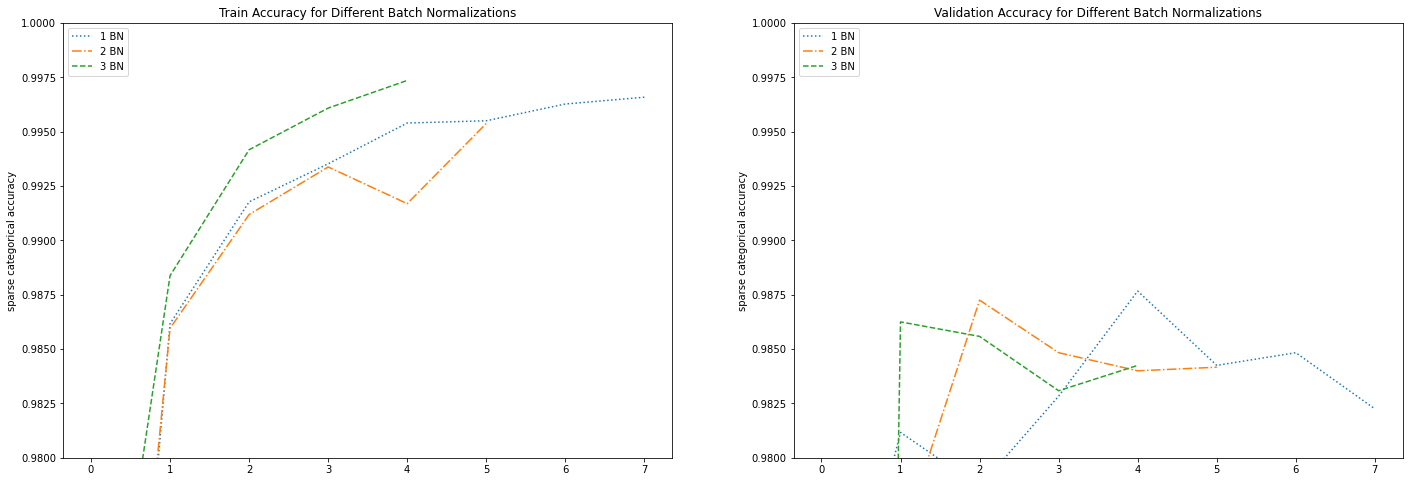

In [138]:
plt.figure(figsize=(24,8))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(output_list_b[i].history['sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Train Accuracy for Different Batch Normalizations')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])

plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(output_list_b[i].history['val_sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Validation Accuracy for Different Batch Normalizations')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1]) 

plt.savefig('batch_norm_mnist.png');
plt.show();



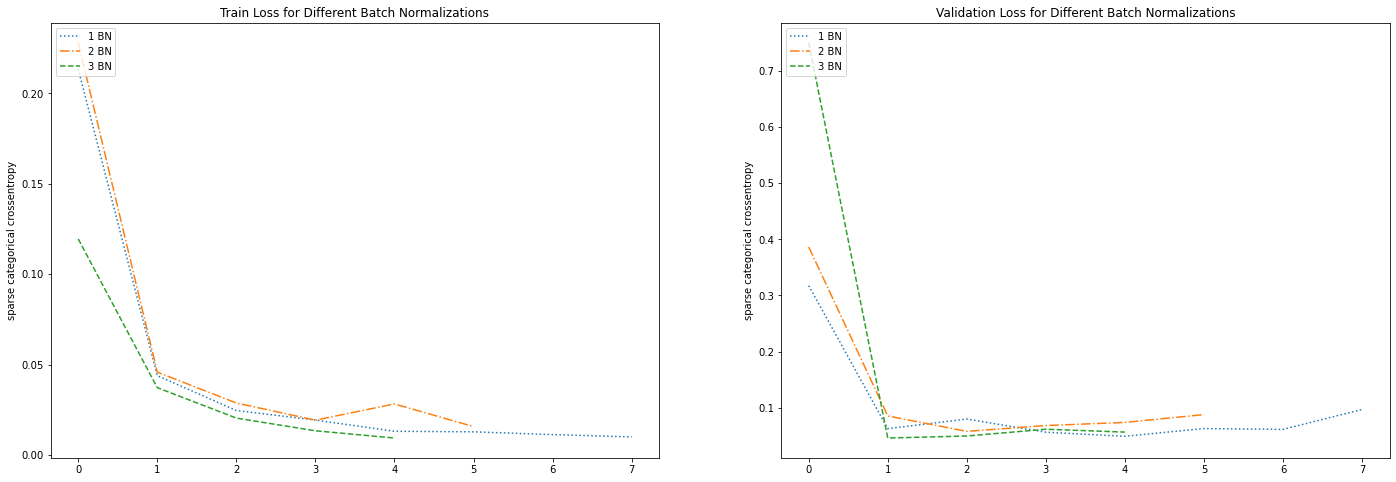

In [139]:
plt.figure(figsize=(24,8))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(output_list_b[i].history['loss'],linestyle=styles[i])

plt.title('Train Loss for Different Batch Normalizations')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])

plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(output_list_b[i].history['val_loss'],linestyle=styles[i])

plt.title('Validation Loss for Different Batch Normalizations')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1]) 

plt.savefig('batch_norm_loss_mnist.png');
plt.show()



In [70]:
lossb = np.zeros(3)
accuracyb= np.zeros(3)
for i in range(3):
  lossb[i], accuracyb[i] = b_model[i].evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9856


In [71]:
display(Markdown(f"This 2 CONV2D layer architecture with different BatchNorm layers gives a test accuracy centered around {np.mean(accuracyb) :.3f}"),
        Markdown(f"The minimum is {min(accuracyb):.4f} and the maximum is {max(accuracyb) :.4f}"))

This 2 CONV2D layer architecture with different BatchNorm layers gives a test accuracy centered around 0.984

The minimum is 0.9823 and the maximum is 0.9856

Adding Batch Normalization after each activation layer seems best.

**Dropout and Batch Normalization Choice:** D=0.5, 3BN



### Optimizers

In [72]:
#OPTIMIZER 3 different learning rates using adam
nets = 3
o_model = [0]*nets
optimizers = [tf.keras.optimizers.Adam(1e-2),tf.keras.optimizers.Adam(1e-3),tf.keras.optimizers.Adam(1e-4)]
output_list_o = []
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)

start_full_o = time.time()
for j in range(nets):
    o_model[j] = tf.keras.models.Sequential()
    o_model[j].add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu',
              input_shape=(28,28,1)))
    o_model[j].add(tf.keras.layers.Dropout(0.5))
    o_model[j].add(tf.keras.layers.BatchNormalization())

    o_model[j].add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu'))
    o_model[j].add(tf.keras.layers.Dropout(0.5))
    o_model[j].add(tf.keras.layers.BatchNormalization())


    o_model[j].add(tf.keras.layers.Flatten())
    o_model[j].add(tf.keras.layers.Dense(256, activation='relu'))
    o_model[j].add(tf.keras.layers.Dropout(0.5))
    o_model[j].add(tf.keras.layers.BatchNormalization())

    o_model[j].add(tf.keras.layers.Dense(10, activation='softmax'))
    o_model[j].compile(optimizer=optimizers[j],loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

    start= time.time()
    output_list_o.append(o_model[j].fit(x_train, y_train, epochs=100, batch_size=128, callbacks= [early_stop], validation_split= 0.2))
    end = time.time()

    display(Markdown(f"**Training time for {len(output_list_o[j].epoch)} epochs**: {(end-start): .3f}s"))

end_full_o = time.time()

Epoch 1/100
375/375 [==============================] - 62s 165ms/step - loss: 0.2237 - sparse_categorical_accuracy: 0.9307 - val_loss: 0.1317 - val_sparse_categorical_accuracy: 0.9618
Epoch 2/100
375/375 [==============================] - 61s 163ms/step - loss: 0.1016 - sparse_categorical_accuracy: 0.9689 - val_loss: 0.0473 - val_sparse_categorical_accuracy: 0.9858
Epoch 3/100
375/375 [==============================] - 61s 163ms/step - loss: 0.0876 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.0647 - val_sparse_categorical_accuracy: 0.9826
Epoch 4/100
375/375 [==============================] - 61s 163ms/step - loss: 0.0731 - sparse_categorical_accuracy: 0.9772 - val_loss: 0.0535 - val_sparse_categorical_accuracy: 0.9852
Epoch 5/100
375/375 [==============================] - 61s 163ms/step - loss: 0.0623 - sparse_categorical_accuracy: 0.9814 - val_loss: 0.0496 - val_sparse_categorical_accuracy: 0.9861


**Training time for 5 epochs**:  307.093s

Epoch 1/100
375/375 [==============================] - 62s 163ms/step - loss: 0.2475 - sparse_categorical_accuracy: 0.9251 - val_loss: 1.1156 - val_sparse_categorical_accuracy: 0.6403
Epoch 2/100
375/375 [==============================] - 61s 162ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9751 - val_loss: 0.0559 - val_sparse_categorical_accuracy: 0.9827
Epoch 3/100
375/375 [==============================] - 61s 163ms/step - loss: 0.0647 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.0388 - val_sparse_categorical_accuracy: 0.9888
Epoch 4/100
375/375 [==============================] - 61s 163ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0329 - val_sparse_categorical_accuracy: 0.9900
Epoch 5/100
375/375 [==============================] - 61s 163ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.0344 - val_sparse_categorical_accuracy: 0.9897
Epoch 6/100
375/375 [==============================] - 61s 163ms/step - loss: 0.

**Training time for 9 epochs**:  550.652s

Epoch 1/100
375/375 [==============================] - 62s 163ms/step - loss: 0.6248 - sparse_categorical_accuracy: 0.8043 - val_loss: 0.4210 - val_sparse_categorical_accuracy: 0.9153
Epoch 2/100
375/375 [==============================] - 61s 163ms/step - loss: 0.2426 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.1179 - val_sparse_categorical_accuracy: 0.9663
Epoch 3/100
375/375 [==============================] - 61s 162ms/step - loss: 0.1638 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9776
Epoch 4/100
375/375 [==============================] - 61s 162ms/step - loss: 0.1301 - sparse_categorical_accuracy: 0.9619 - val_loss: 0.0681 - val_sparse_categorical_accuracy: 0.9799
Epoch 5/100
375/375 [==============================] - 61s 162ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0.9700 - val_loss: 0.0585 - val_sparse_categorical_accuracy: 0.9834
Epoch 6/100
375/375 [==============================] - 61s 162ms/step - loss: 0.

**Training time for 24 epochs**:  1463.284s

In [73]:
display(Markdown(f"**Total training time for 3 Learning rates**: {(end_full_o -start_full_o): .3f}s; {(end_full_o -start_full_o)/60 : .3f}m "))

**Total training time for 3 Learning rates**:  2321.283s;  38.688m 

In [74]:
for i in range(3):
  tf.keras.utils.plot_model(o_model[i], f'o_model{i}.png', show_shapes=True) 
  # all model str saved in file dir
  print(o_model[i].summary())

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 dropout_18 (Dropout)        (None, 28, 28, 24)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 24)       96        
 hNormalization)                                                 
                                                                 
 conv2d_73 (Conv2D)          (None, 28, 28, 24)        14424     
                                                                 
 dropout_19 (Dropout)        (None, 28, 28, 24)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 24)       96        
 hNormalization)                                     

In [140]:
t_epochs = np.zeros(3)
names = ["Adam(1e-2)", "Adam(1e-3)", "Adam(1e-4)"]

for i in range(3):
    t_epochs[i] = len(output_list_o[i].epoch)
    display(Markdown(f"**{names[i]} :** {t_epochs[i]} epochs to converge"))


**Adam(1e-2) :** 5.0 epochs to converge

**Adam(1e-3) :** 9.0 epochs to converge

**Adam(1e-4) :** 24.0 epochs to converge

Obviously, we can see that smaller learning rates takes longer to converge, since they are taking smaller steps.

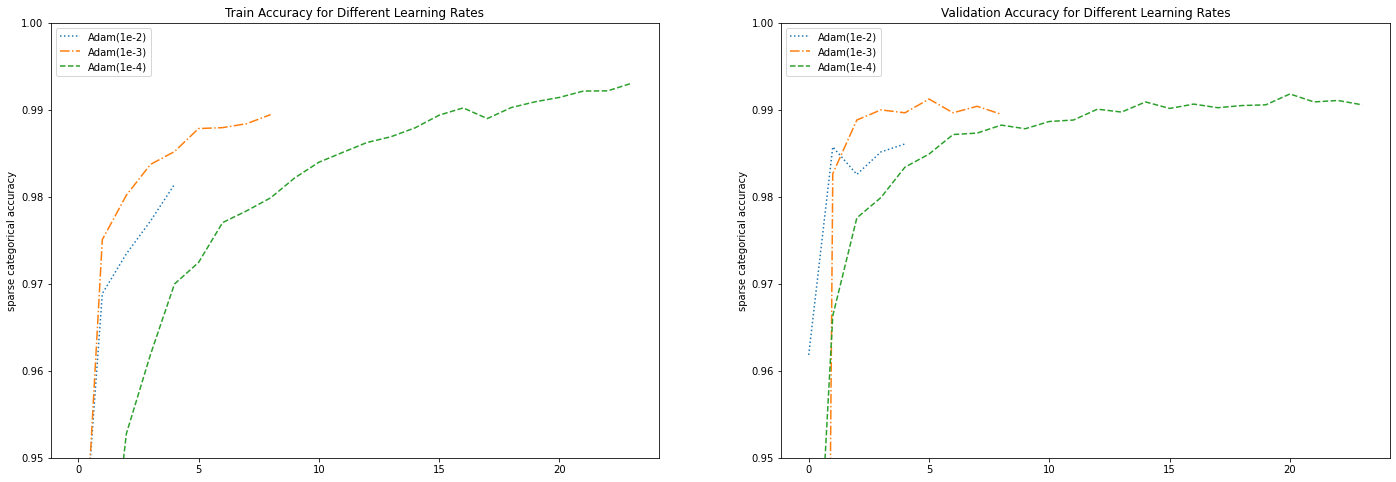

In [141]:
plt.figure(figsize=(24,8))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(output_list_o[i].history['sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Train Accuracy for Different Learning Rates')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.95,1])

plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(output_list_o[i].history['val_sparse_categorical_accuracy'],linestyle=styles[i])

plt.title('Validation Accuracy for Different Learning Rates')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.95,1]) 

plt.savefig('opt_mnist.png');
plt.show()



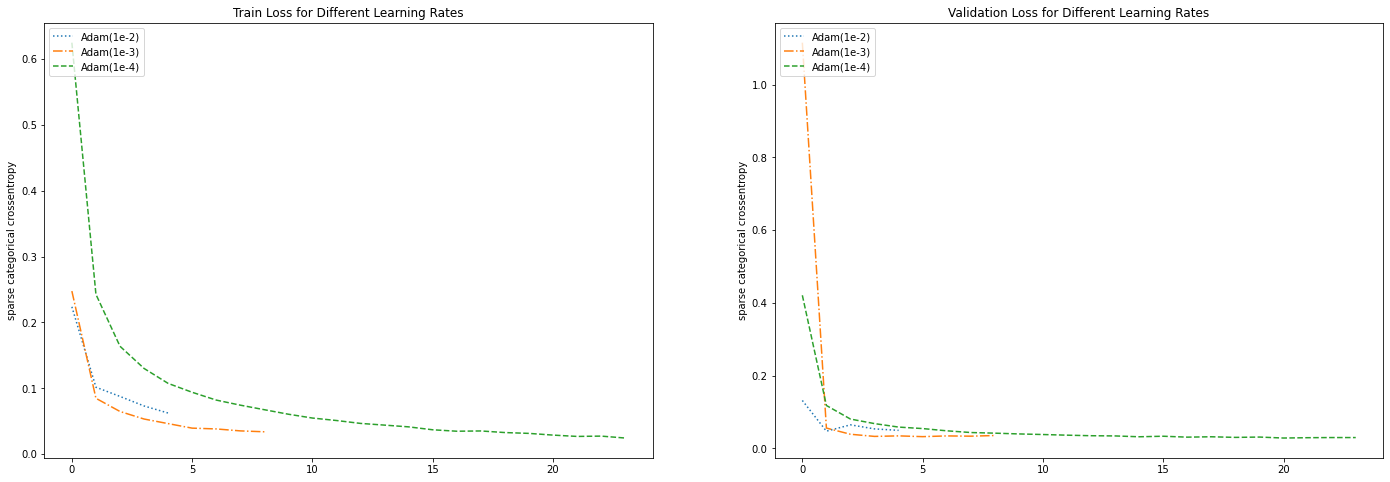

In [142]:
plt.figure(figsize=(24,8))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(output_list_o[i].history['loss'],linestyle=styles[i])

plt.title('Train Loss for Different Learning Rates')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])

plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(output_list_o[i].history['val_loss'],linestyle=styles[i])

plt.title('Validation Loss for Different Learning Rates')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1]) 

plt.savefig('opt_loss_mnist.png');
plt.show()



**Evaluate Optimizers**



In [81]:
losso = np.zeros(3)
accuracyo= np.zeros(3)
for i in range(3):
  losso[i], accuracyo[i] = o_model[i].evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0223 - sparse_categorical_accuracy: 0.9927


In [82]:
display(Markdown(f"This 2 CONV2D layer architecture with different Optimizer Learning Rates gives a test accuracy centered around {np.mean(accuracyo) :.3f}"),
        Markdown(f"The minimum is {min(accuracyo):.4f} and the maximum is {max(accuracyo) :.4f}"))

This 2 CONV2D layer architecture with different Optimizer Learning Rates gives a test accuracy centered around 0.990

The minimum is 0.9868 and the maximum is 0.9927

It seems that learning rate of 1e-4 is doing best in training and validation, but is only slightly better than 1e-3 and when also looking at testing accuracy overall, 1e-3 is doing best. 

### MaxPooling

Why to use Pooling Layers?

- Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
- The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer. This makes the model more robust to variations in the position of the features in the input image. 

`tf.keras.layers.MaxPool2D(pool_size=(2,2))` is default pool size

In [83]:

start_full_m = time.time()

m_model = tf.keras.models.Sequential()
m_model.add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu',
          input_shape=(28,28,1)))
m_model.add(tf.keras.layers.BatchNormalization())
m_model.add(tf.keras.layers.MaxPool2D())
m_model.add(tf.keras.layers.Dropout(0.5))

m_model.add(tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu'))
m_model.add(tf.keras.layers.BatchNormalization())
m_model.add(tf.keras.layers.MaxPool2D())
m_model.add(tf.keras.layers.Dropout(0.5))

m_model.add(tf.keras.layers.Flatten())
m_model.add(tf.keras.layers.Dense(256, activation='relu'))
m_model.add(tf.keras.layers.BatchNormalization())
m_model.add(tf.keras.layers.Dropout(0.5))

m_model.add(tf.keras.layers.Dense(10, activation='softmax'))
m_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

start= time.time()
output_list_m = m_model.fit(x_train, y_train, epochs=100, batch_size=128, callbacks= [early_stop], validation_split= 0.2)
end = time.time()

display(Markdown(f"**Training time for {len(output_list_m.epoch)} epochs**: {(end-start): .3f}s"))

end_full_m = time.time()

Epoch 1/100
375/375 [==============================] - 22s 58ms/step - loss: 0.4593 - sparse_categorical_accuracy: 0.8578 - val_loss: 1.9275 - val_sparse_categorical_accuracy: 0.2409
Epoch 2/100
375/375 [==============================] - 22s 60ms/step - loss: 0.1581 - sparse_categorical_accuracy: 0.9504 - val_loss: 0.0648 - val_sparse_categorical_accuracy: 0.9798
Epoch 3/100
375/375 [==============================] - 22s 59ms/step - loss: 0.1212 - sparse_categorical_accuracy: 0.9613 - val_loss: 0.0604 - val_sparse_categorical_accuracy: 0.9820
Epoch 4/100
375/375 [==============================] - 22s 59ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9678 - val_loss: 0.0488 - val_sparse_categorical_accuracy: 0.9851
Epoch 5/100
375/375 [==============================] - 22s 58ms/step - loss: 0.0877 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.0434 - val_sparse_categorical_accuracy: 0.9869
Epoch 6/100
375/375 [==============================] - 22s 59ms/step - loss: 0.0808 -

**Training time for 16 epochs**:  354.080s

In [84]:
tf.keras.utils.plot_model(m_model, f'm_model.png', show_shapes=True) 
  # all model str saved in file dir
print(m_model.summary())

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 24)       96        
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 dropout_27 (Dropout)        (None, 14, 14, 24)        0         
                                                                 
 conv2d_79 (Conv2D)          (None, 14, 14, 24)        14424     
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 24)     

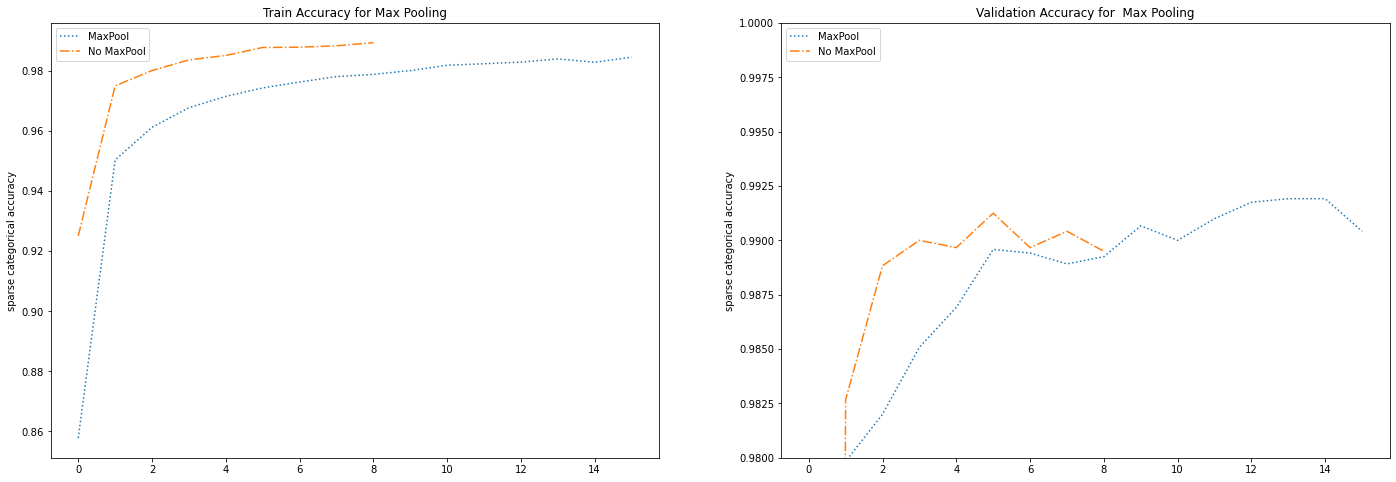

In [103]:
plt.figure(figsize=(24,8))

plt.subplot(1, 2, 1)

plt.plot(output_list_m.history['sparse_categorical_accuracy'],linestyle=styles[0])
plt.plot(output_list_o[1].history['sparse_categorical_accuracy'],linestyle=styles[1])

plt.title('Train Accuracy for Max Pooling')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(['MaxPool', 'No MaxPool'], loc='upper left')
#axes = plt.gca()
axes.set_ylim([0.98,1])


plt.subplot(1, 2, 2)

plt.plot(output_list_m.history['val_sparse_categorical_accuracy'],linestyle=styles[0])
plt.plot(output_list_o[1].history['val_sparse_categorical_accuracy'],linestyle=styles[1])

plt.title('Validation Accuracy for  Max Pooling')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(['MaxPool', 'No MaxPool'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1]) 

plt.savefig('maxpool_mnist.png');
plt.show()



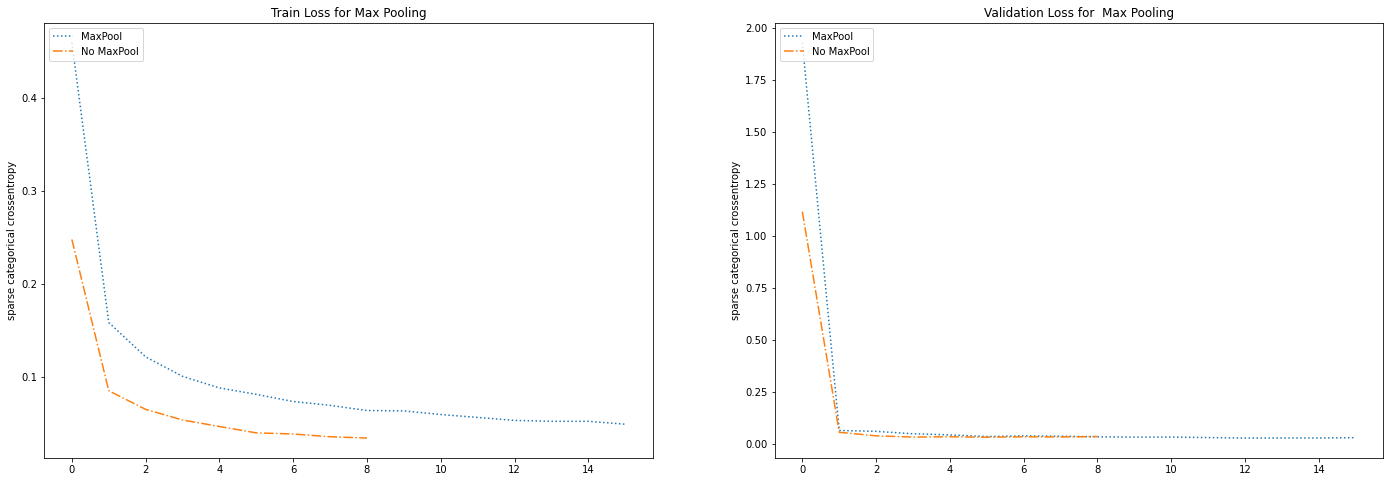

In [102]:
plt.figure(figsize=(24,8))

plt.subplot(1, 2, 1)

plt.plot(output_list_m.history['loss'],linestyle=styles[0])
plt.plot(output_list_o[1].history['loss'],linestyle=styles[1])

plt.title('Train Loss for Max Pooling')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(['MaxPool', 'No MaxPool'], loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1])


plt.subplot(1, 2, 2)

plt.plot(output_list_m.history['val_loss'],linestyle=styles[0])
plt.plot(output_list_o[1].history['val_loss'],linestyle=styles[1])

plt.title('Validation Loss for  Max Pooling')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(['MaxPool', 'No MaxPool'], loc='upper left')
axes = plt.gca()
#axes.set_ylim([0.98,1]) 


plt.savefig('maxpool_loss_mnist.png');
plt.show()



**Evaluate MaxPool**



In [87]:
lossm, accuracym = m_model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0224 - sparse_categorical_accuracy: 0.9922


In [143]:
display(Markdown(f"This 2 CONV2D layer architecture with MaxPooling gives a test accuracy of {accuracym :.4f} compared to 0.9912 without MaxPooling"))

This 2 CONV2D layer architecture with MaxPooling gives a test accuracy of 0.9922 compared to 0.9912 without MaxPooling

It seems that although having MaxPool doesn't get better results in training, in validation, it performs as well as the model without MaxPool. This implies that MaxPooling gives the model robustness to unseen data. Also, the testing accuracy might be lower, but it is a negligable amount when taking computational cost into consideration.

#### Best Model
The best model found looks like this:



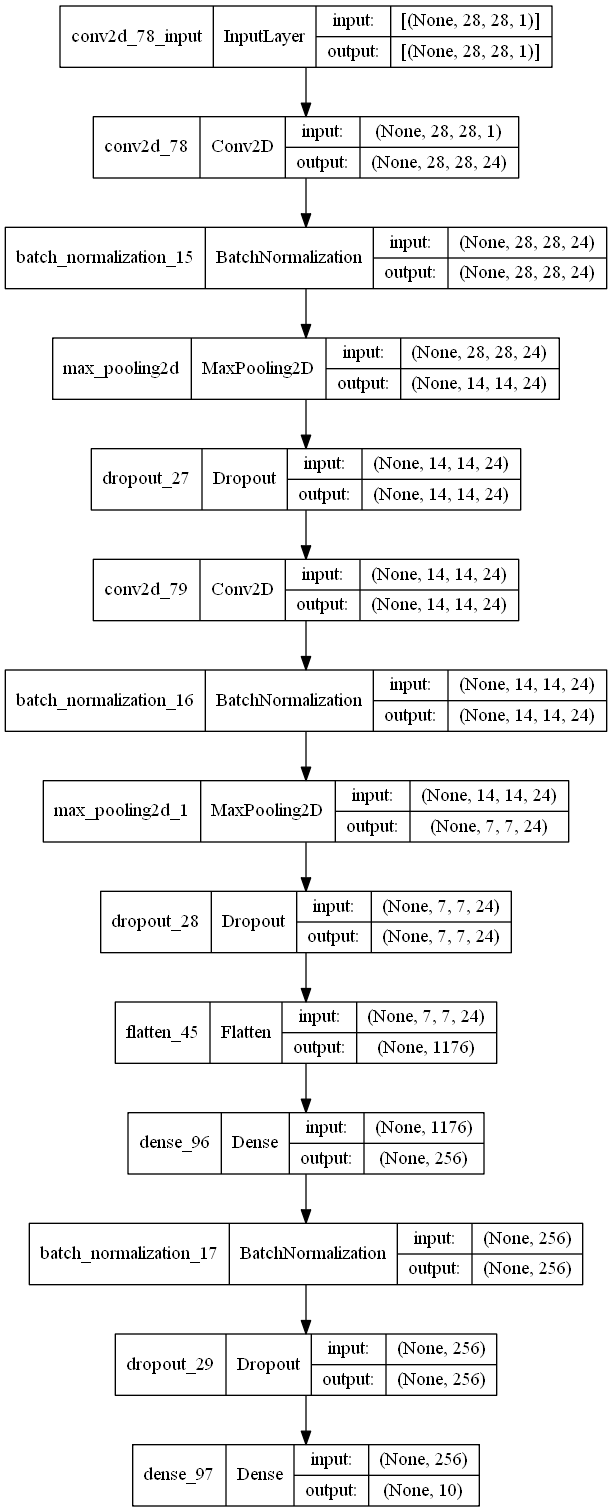

In [91]:
tf.keras.utils.plot_model(m_model,'best_model_mnist.png', show_shapes=True) 


- 2 CONV2D layers with filter size 24, ReLU activation
- MaxPool, Dropout(0.5) and BatchNormalization regularization
- Dense(256) layer, ReLU activation
- Dense(10) for classification, softmax activation

- optimizer: Adam(0.001)
- Early stopping: patience = 3






---



## Test Generality of Network on Fashion MNIST Data
### Load Fashion MNIST Data

In [92]:
fmnist = tf.keras.datasets.fashion_mnist #28x28 spatial dimension, 1 color dimension (28x28x1), 10 classes (10 different clothing objects)

(fx_train, fy_train), (fx_test, fy_test) = fmnist.load_data()
fx_train, fx_test = fx_train / 255.0, fx_test / 255.0

In [93]:
display(Markdown('**Data Description**'))
display(Markdown(f"Training sample size: {fx_train.shape[0]}"), 
Markdown(f"Testing sample size: {fx_test.shape[0]}"),
Markdown(f"Number of labels: {len(np.unique(fy_train))}"))


**Data Description**

Training sample size: 60000

Testing sample size: 10000

Number of labels: 10

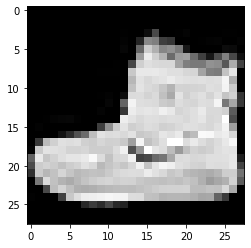

In [119]:
image = fx_train[0]
plt.imshow(image, cmap='gray')
plt.savefig('imexample_fashion.png')
plt.show()

### Train Model for Fashion-MNIST data

In [94]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)


f_model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu', input_shape=(28,28,1)),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Dropout(0.5),


     
     tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPool2D(),
     tf.keras.layers.Dropout(0.5),
     
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(10, activation='softmax')
    ])

f_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

f_start= time.time()
f_history = f_model.fit(fx_train, fy_train, epochs=100, batch_size=128, callbacks= [early_stop], validation_split= 0.2)
f_end = time.time()

display(Markdown(f"**Training time for {len(f_history.epoch)} epochs**: {(f_end-f_start): .3f}s"))

Epoch 1/100
375/375 [==============================] - 23s 60ms/step - loss: 0.7362 - sparse_categorical_accuracy: 0.7437 - val_loss: 1.1261 - val_sparse_categorical_accuracy: 0.5950
Epoch 2/100
375/375 [==============================] - 22s 60ms/step - loss: 0.4684 - sparse_categorical_accuracy: 0.8295 - val_loss: 0.3549 - val_sparse_categorical_accuracy: 0.8716
Epoch 3/100
375/375 [==============================] - 22s 60ms/step - loss: 0.4101 - sparse_categorical_accuracy: 0.8476 - val_loss: 0.3289 - val_sparse_categorical_accuracy: 0.8787
Epoch 4/100
375/375 [==============================] - 23s 60ms/step - loss: 0.3775 - sparse_categorical_accuracy: 0.8625 - val_loss: 0.3070 - val_sparse_categorical_accuracy: 0.8838
Epoch 5/100
375/375 [==============================] - 23s 61ms/step - loss: 0.3566 - sparse_categorical_accuracy: 0.8699 - val_loss: 0.2862 - val_sparse_categorical_accuracy: 0.8917
Epoch 6/100
375/375 [==============================] - 23s 60ms/step - loss: 0.3384 -

**Training time for 9 epochs**:  203.301s

In [95]:
tf.keras.utils.plot_model(f_model, f'f_model.png', show_shapes=True) 
  # all model str saved in file dir
print(f_model.summary())

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 24)       96        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 24)       0         
 2D)                                                             
                                                                 
 dropout_30 (Dropout)        (None, 14, 14, 24)        0         
                                                                 
 conv2d_81 (Conv2D)          (None, 14, 14, 24)        14424     
                                                                 
 batch_normalization_19 (Bat  (None, 14, 14, 24)     

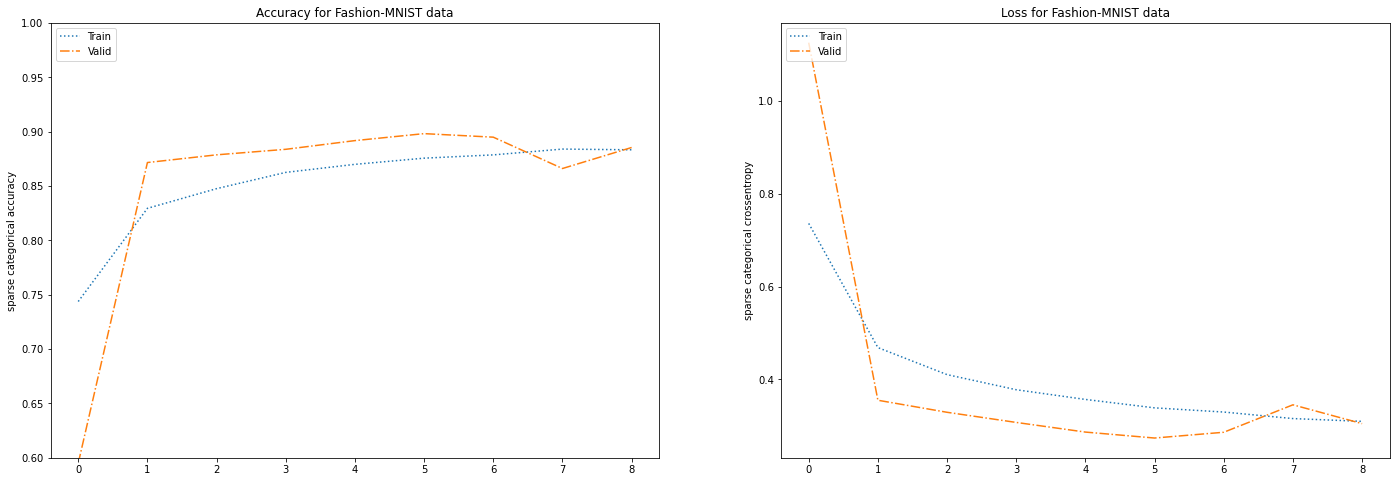

In [101]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(f_history.history['sparse_categorical_accuracy'],linestyle=styles[0])
plt.plot(f_history.history['val_sparse_categorical_accuracy'],linestyle=styles[1])
plt.title('Accuracy for Fashion-MNIST data')
plt.ylabel('sparse categorical accuracy')
#plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0.60,1])

plt.subplot(1,2,2)
plt.plot(f_history.history['loss'],linestyle=styles[0])
plt.plot(f_history.history['val_loss'],linestyle=styles[1])
plt.title('Loss for Fashion-MNIST data')
plt.ylabel('sparse categorical crossentropy')
#plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
axes = plt.gca()

plt.savefig('fmnist.png');
plt.show()



**Evaluate Fashion MNIST**



In [97]:
lossf, accuracyf = f_model.evaluate(fx_test, fy_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3198 - sparse_categorical_accuracy: 0.8797


In [98]:
display(Markdown(f"The best model for handwritten digits MNIST data gives test accuracy of {accuracyf :.4f} for the Fashion-MNIST dataset, compared to 0.9922 for the MNIST data"))

The best model for handwritten digits MNIST data gives test accuracy of 0.8797 for the Fashion-MNIST dataset, compared to 0.9922 for the MNIST data

**Results**

It appears that the best model for the MNIST data does not give as high accuracy on the fashion mnist data as on the mnist data (for both training set or on the testing set). The model still looks stable and gives approximately 0.88.



---



### Re-Run all the tuning process on Fashion MNISt data



 Now re-run the entire previous step on the fashion-MNIST dataset.This is done on the second notebook